In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
sns.set_theme()

In [7]:
df = pd.read_csv('../datasets/competition_dataset/dev.tsv', sep='\t')
df.head()

,country,description,designation,province,region_1,region_2,variety,winery,quality
0,France,"A creamed pear wine, with an attractive tang o...",Brut Blanc de Blancs,Alsace,Crémant d'Alsace,NaN,Pinot Blanc,Lucien Albrecht,45.0
1,US,"Simple and dry, this Cabernet has modest black...",NaN,California,Paso Robles,Central Coast,Cabernet Sauvignon,Castle Rock,31.0
2,US,"This lovely wine captures the floral, perfumed...",NaN,Oregon,Willamette Valley,Willamette Valley,Gewürztraminer,Château Bianca,35.0
3,Portugal,"The aromas are the thing here, as so often wit...",NaN,Alentejano,NaN,NaN,Touriga Nacional,Herdade do Esporão,41.0
4,Italy,"This is an interesting, outright strange wine ...",Natì,Southern Italy,Pompeiano,NaN,Coda di Volpe,Sorrentino,37.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120744 entries, 0 to 120743
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120739 non-null  object 
 1   description  120744 non-null  object 
 2   designation  84226 non-null   object 
 3   province     120739 non-null  object 
 4   region_1     100736 non-null  object 
 5   region_2     48736 non-null   object 
 6   variety      120744 non-null  object 
 7   winery       120744 non-null  object 
 8   quality      120744 non-null  float64
dtypes: float64(1), object(8)
memory usage: 8.3+ MB


In [22]:
df[df.country.isna()]

,country,description,designation,province,region_1,region_2,variety,winery,quality
28353,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,NaN,NaN,NaN,Pinot Noir,Chilcas,37.0
48154,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,NaN,NaN,NaN,Pinot Noir,Chilcas,37.0
76257,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,NaN,NaN,NaN,Pinot Noir,Chilcas,37.0
88206,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,NaN,NaN,NaN,Assyrtiko,Tsililis,38.0
92096,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,NaN,NaN,NaN,Red Blend,Büyülübağ,49.0


# Exploratory data analysis

## Country

In [42]:
df.iloc[0].country

'France'

In [38]:
df.country.isnull().sum()

5

In [40]:
df[df.country.isnull()]

,country,description,designation,province,region_1,region_2,variety,winery,quality
28353,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,NaN,NaN,NaN,Pinot Noir,Chilcas,37.0
48154,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,NaN,NaN,NaN,Pinot Noir,Chilcas,37.0
76257,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,NaN,NaN,NaN,Pinot Noir,Chilcas,37.0
88206,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,NaN,NaN,NaN,Assyrtiko,Tsililis,38.0
92096,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,NaN,NaN,NaN,Red Blend,Büyülübağ,49.0


In [44]:
df.country.unique().size

49

In [93]:
df.groupby(by='country').quality.median().sort_values(ascending=False)

country
US-France                 59.0
England                   56.0
Luxembourg                53.0
US                        49.0
China                     49.0
Hungary                   49.0
France                    49.0
Slovenia                  48.0
Austria                   48.0
Switzerland               48.0
Mexico                    47.0
Canada                    47.0
Italy                     47.0
Israel                    47.0
Germany                   46.0
Japan                     46.0
Lebanon                   44.0
Serbia                    43.0
Egypt                     42.0
Croatia                   42.0
Australia                 42.0
Uruguay                   42.0
Albania                   42.0
Portugal                  42.0
Tunisia                   42.0
New Zealand               42.0
Turkey                    40.0
Greece                    40.0
Morocco                   39.5
Spain                     39.0
South Africa              38.0
Cyprus                    38.0


<AxesSubplot:ylabel='country'>

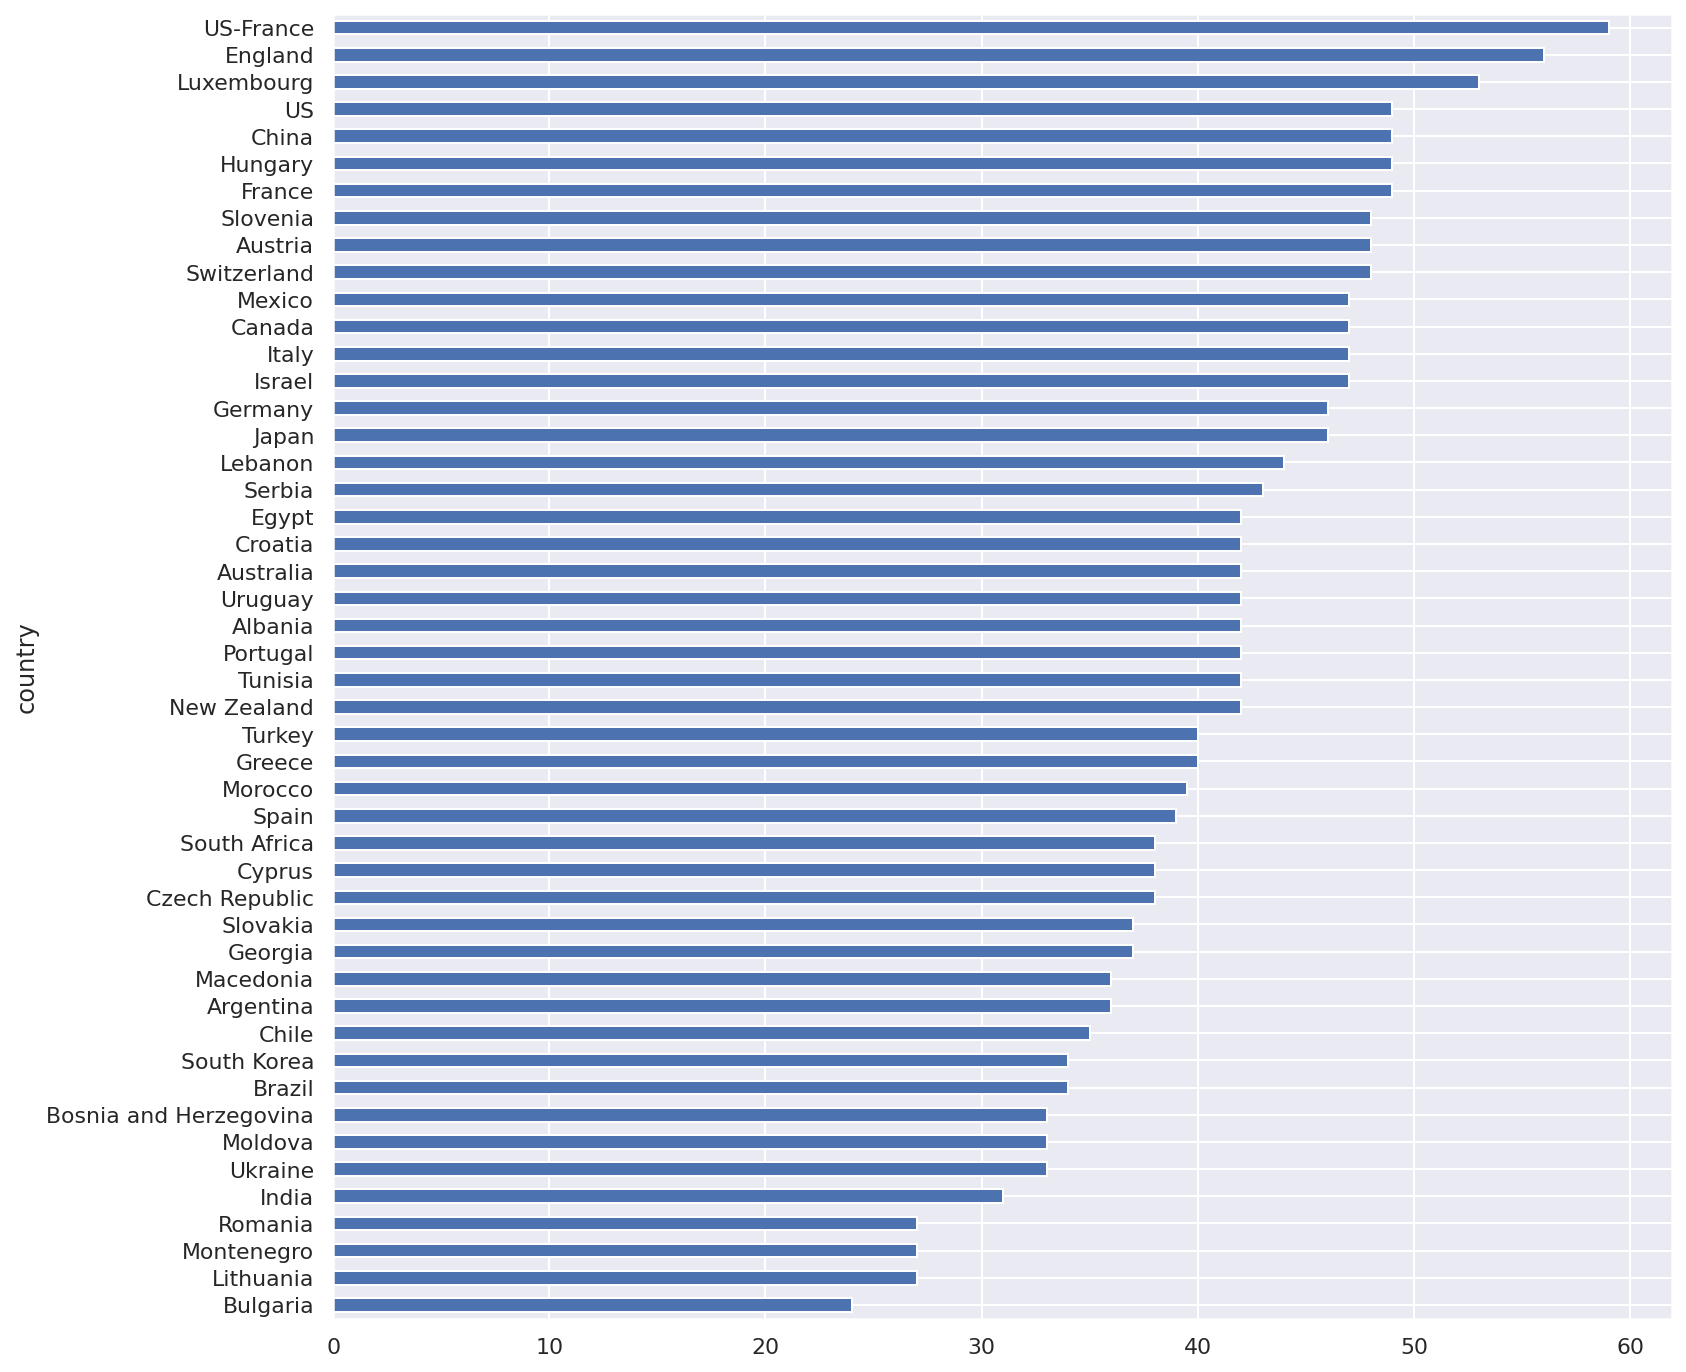

In [91]:
df.groupby(by='country').quality.median().sort_values(ascending=True).plot.barh(figsize=(12,12))

<AxesSubplot:xlabel='quality', ylabel='country'>

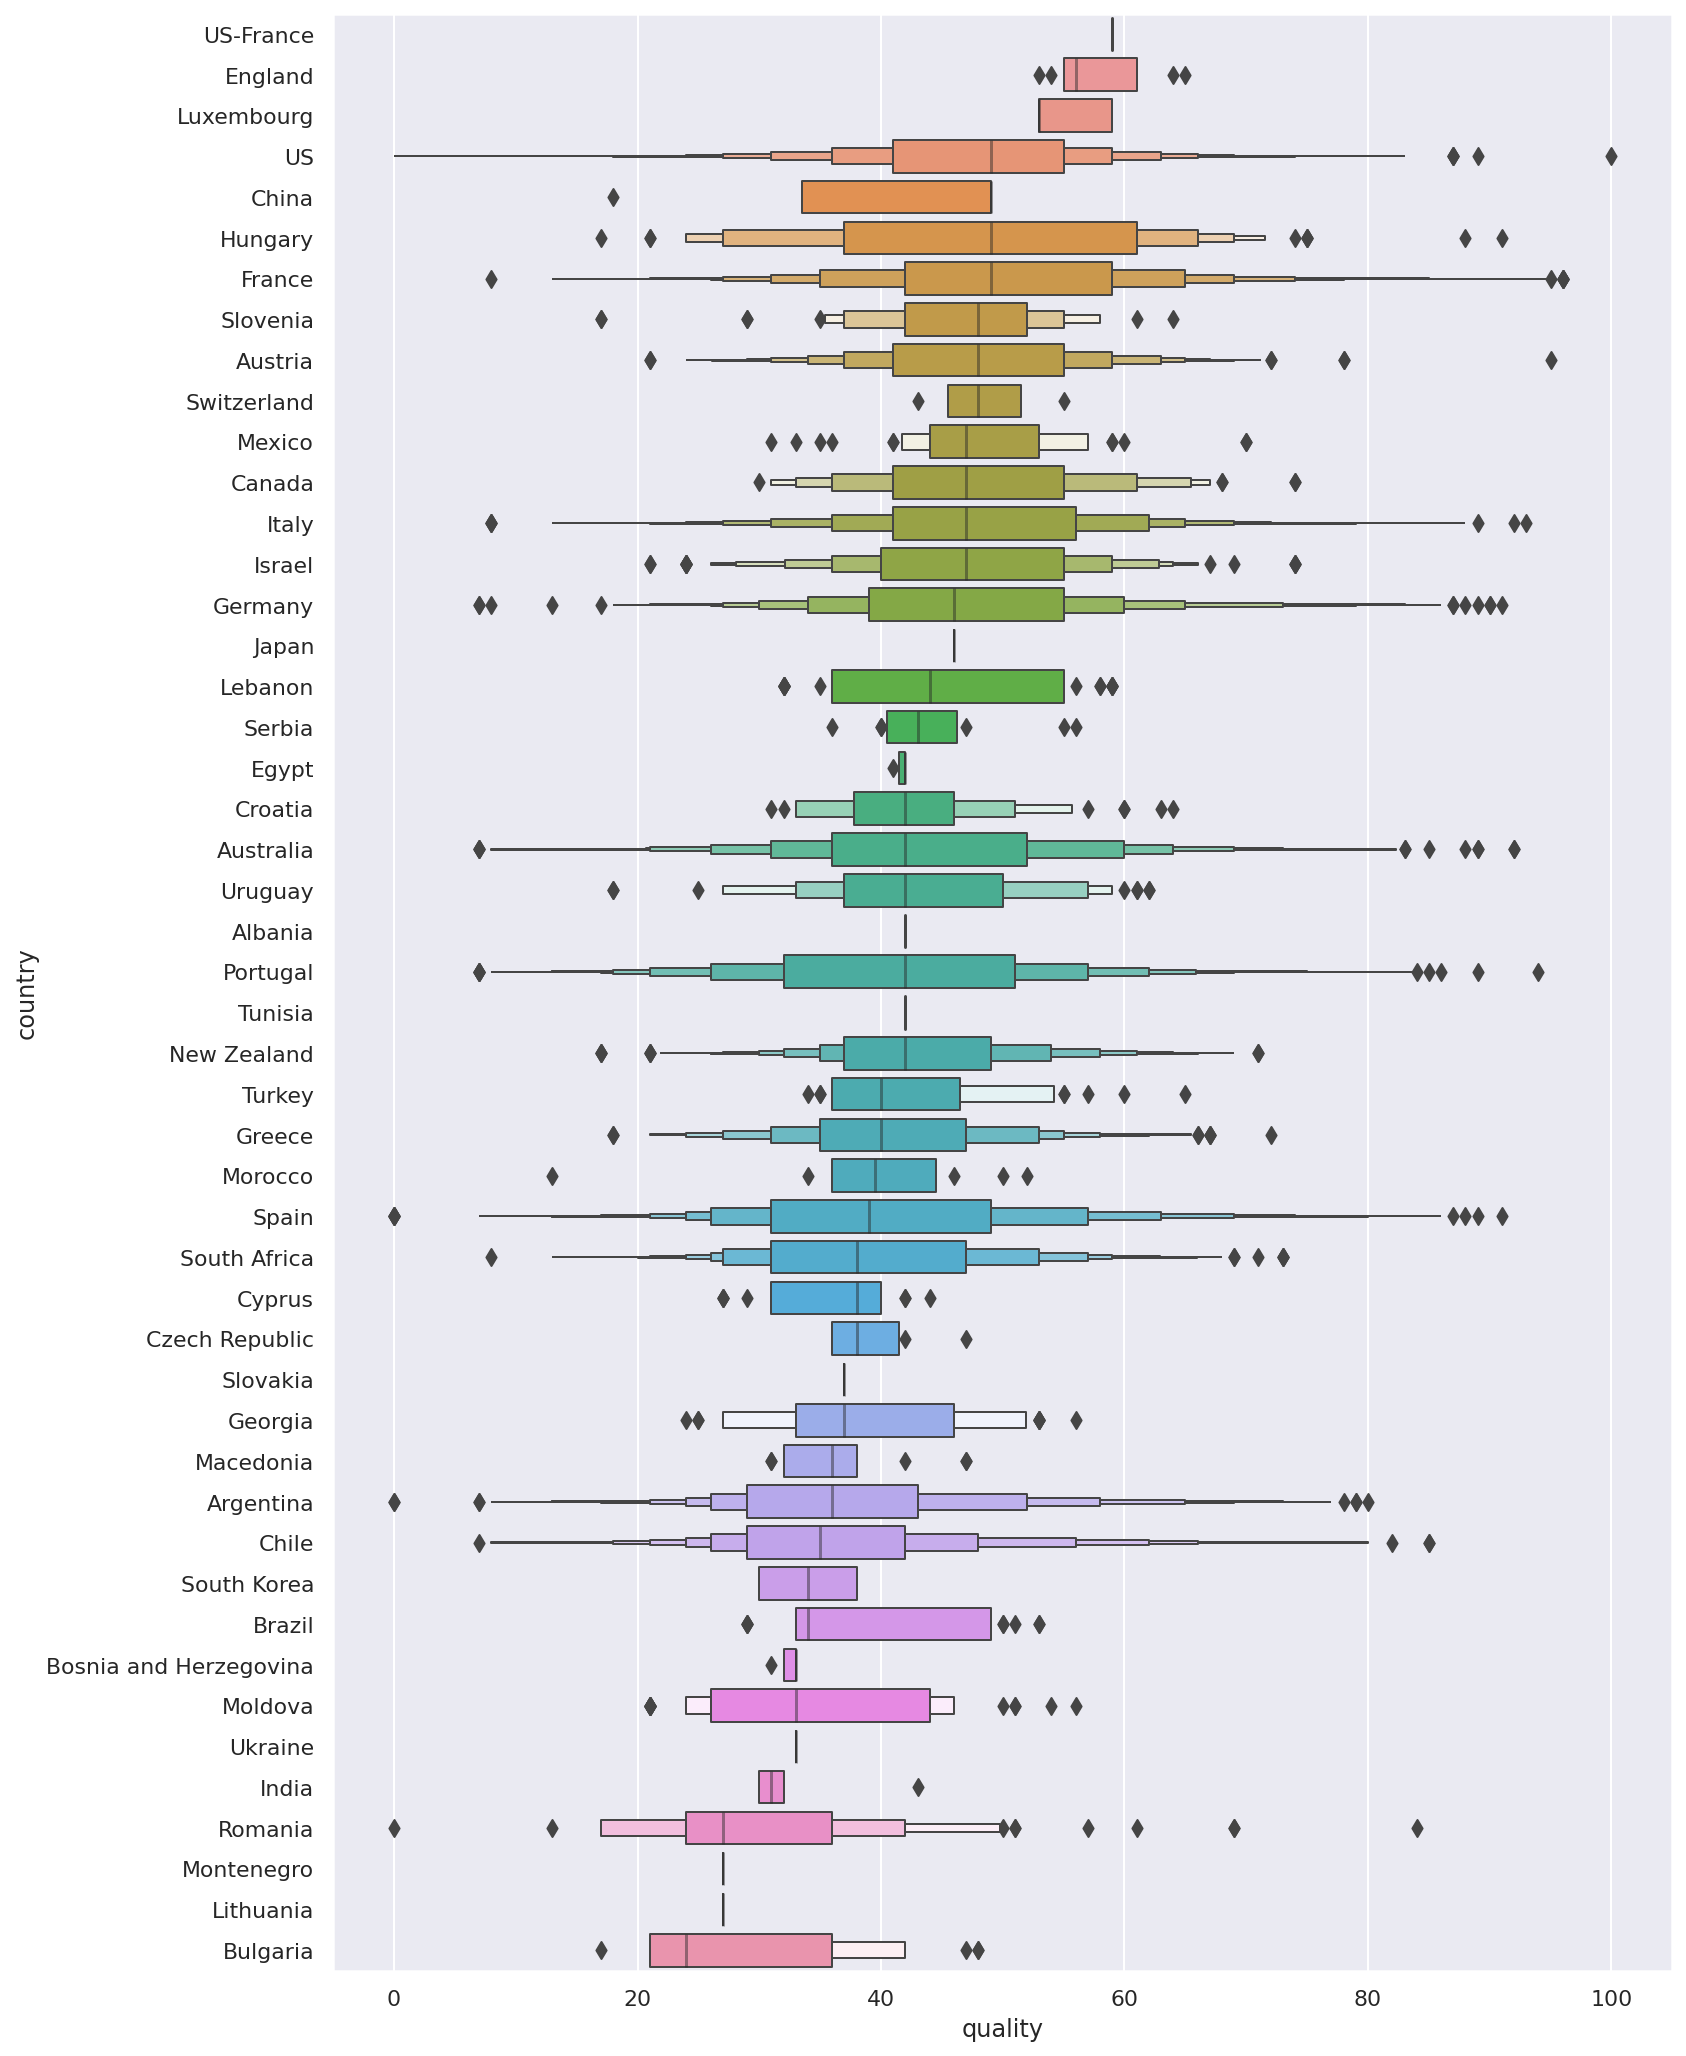

In [79]:
fig, ax = plt.subplots(figsize=(12, 18))
order = df.groupby(by='country').quality.median().sort_values(ascending=False).index
sns.boxenplot(ax=ax, data=df, x='quality', y='country', order=order)

In [279]:
df.country.value_counts()

US                        49908
Italy                     18848
France                    16835
Spain                      6657
Chile                      4647
Argentina                  4519
Portugal                   4228
Australia                  3949
New Zealand                2646
Austria                    2447
Germany                    1963
South Africa               1796
Greece                      711
Israel                      499
Hungary                     187
Canada                      153
Romania                     115
Uruguay                      81
Croatia                      72
Slovenia                     71
Bulgaria                     63
Moldova                      51
Mexico                       47
Turkey                       39
Georgia                      36
Lebanon                      31
Cyprus                       25
Brazil                       21
Macedonia                    14
Serbia                       10
Morocco                      10
England 

In [301]:
# TODO(Andrea): finish

<AxesSubplot:xlabel='count', ylabel='country'>

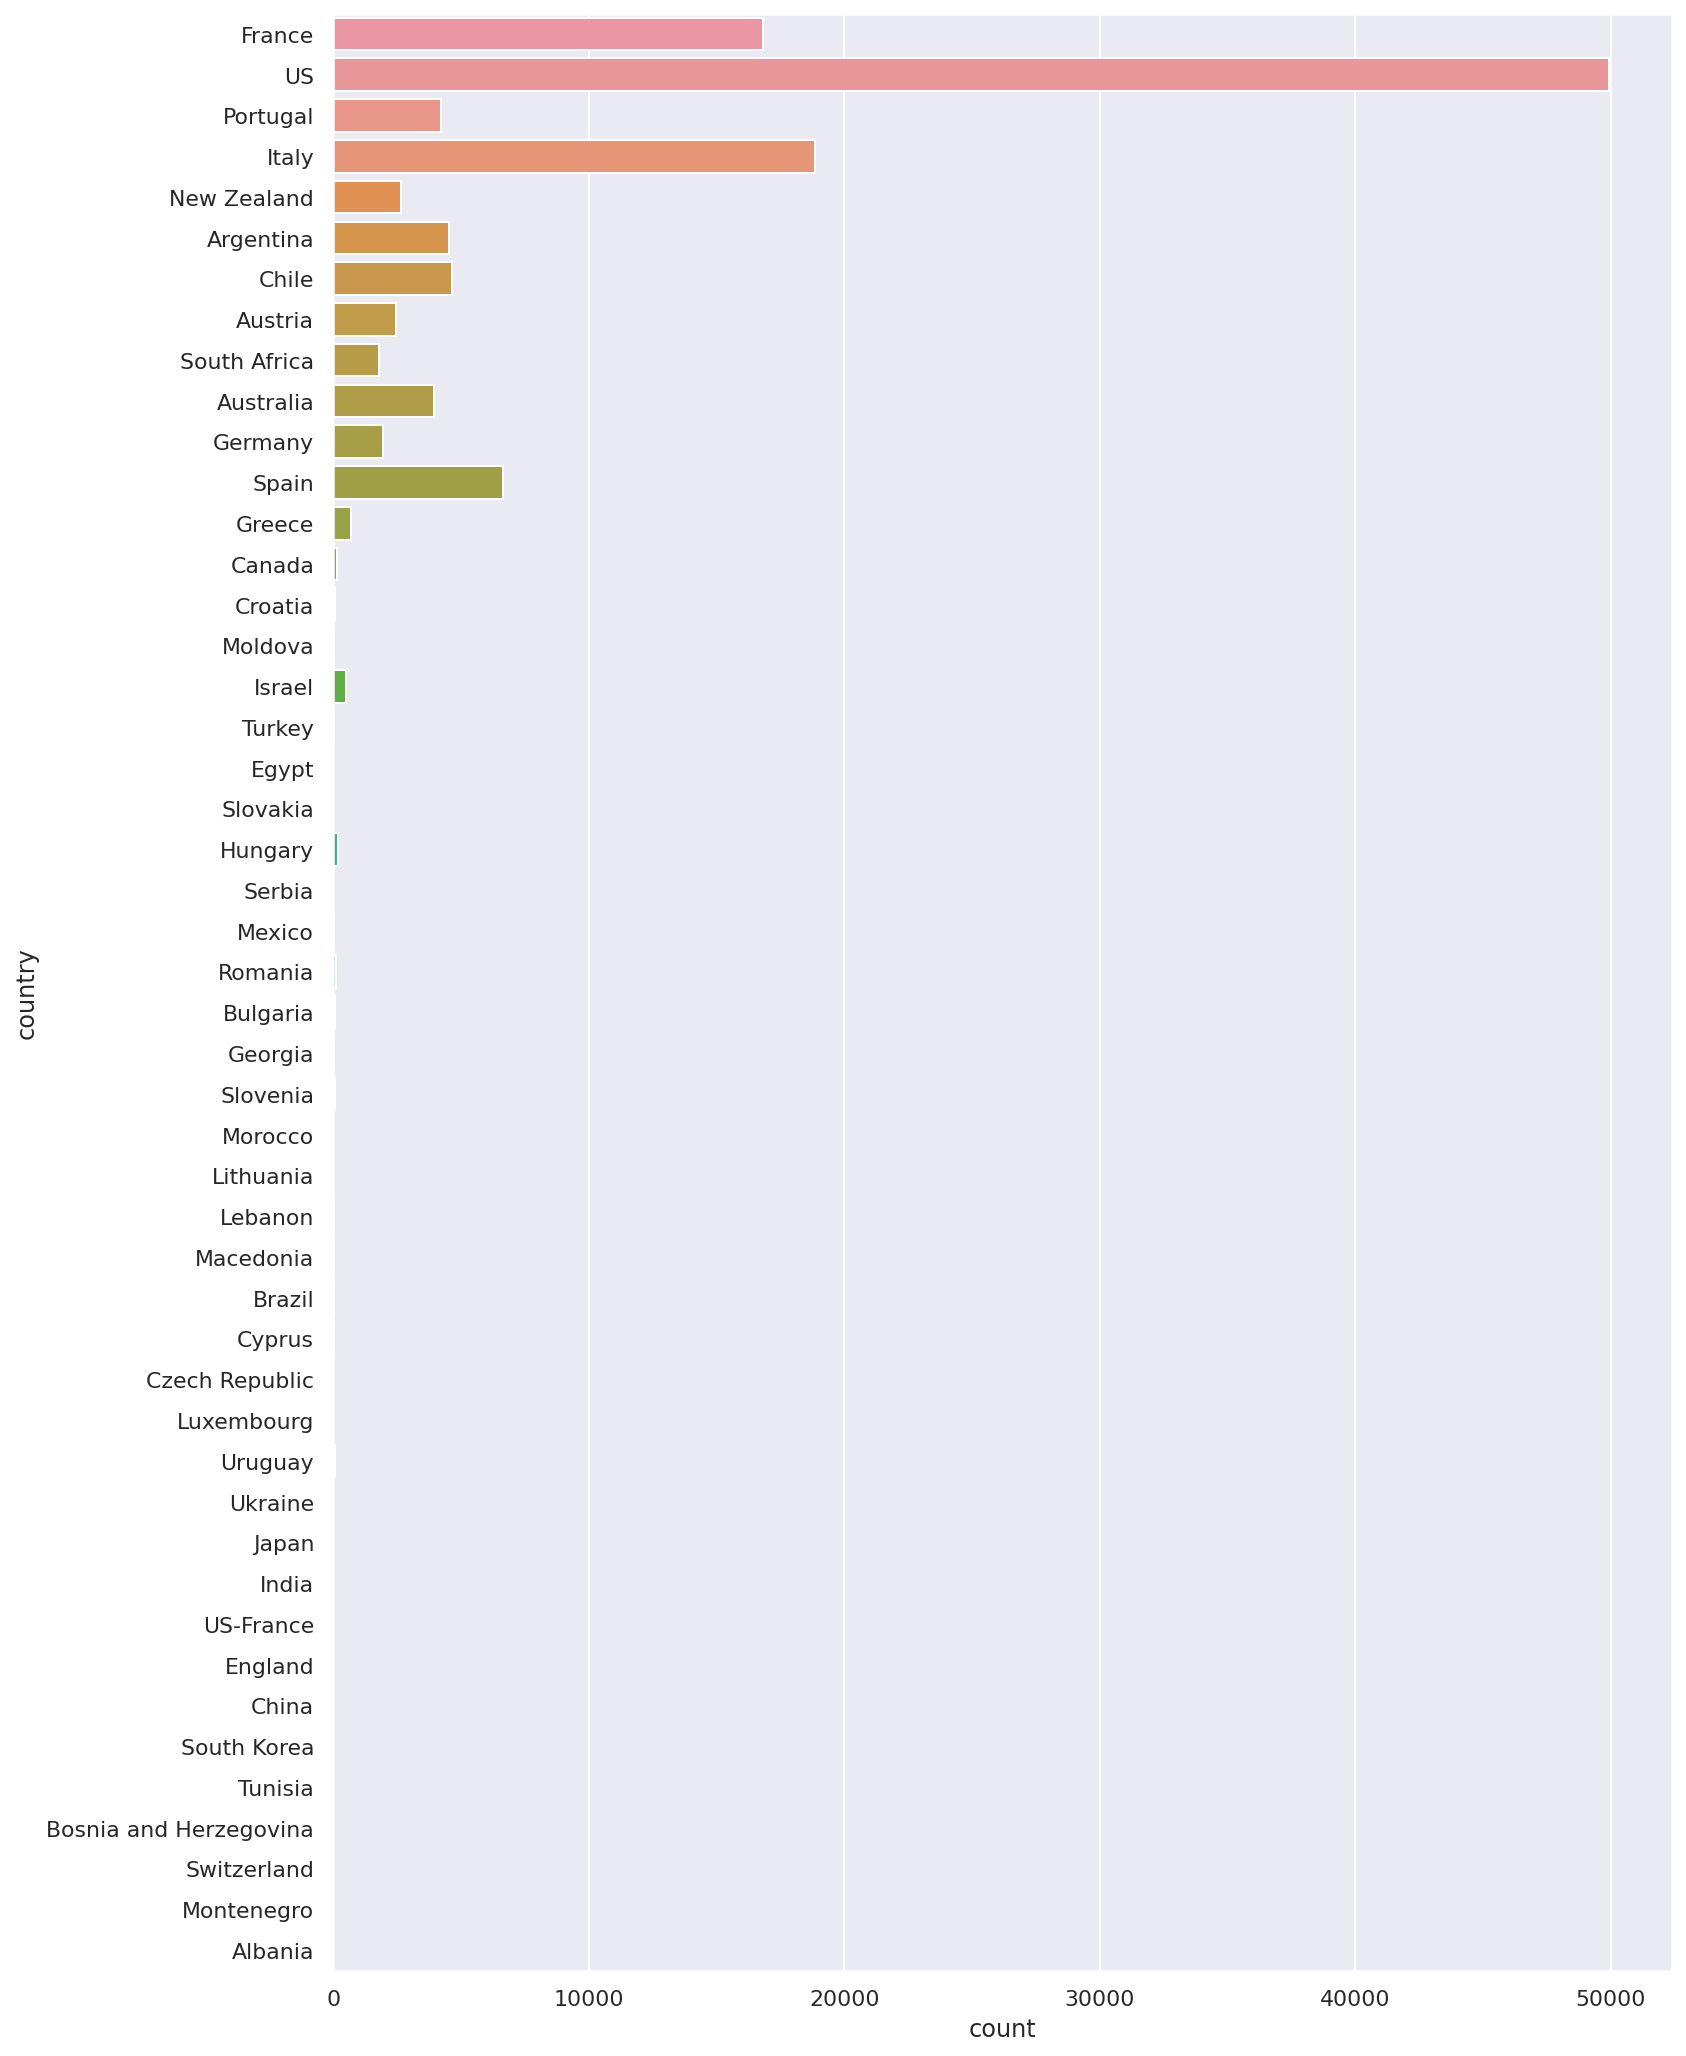

In [300]:
fig, ax = plt.subplots(figsize=(12, 18))
sns.countplot(ax=ax, data=df, y='country')

## Description

In [104]:
df.iloc[:5].description.apply(print)
None

A creamed pear wine, with an attractive tang of orange zest. It is light, bright, vibrant, very fruity. The acidity does seem to be excessive, so give this wine a few months in bottle.
Simple and dry, this Cabernet has modest blackberry, tea and oak flavors. With its firm tannins, it gets the basic Cabernet job done.
This lovely wine captures the floral, perfumed essence of the grape in a restrained, sippable style. It's dry and crisp, with lemony fruit and the delicate sensation that you are drinking fresh flowers.
The aromas are the thing here, as so often with Touriga Nacional, keeping the soft tannins and ripe, sweet fruit buoyant and lively. There is acidity, but there's more, maybe too much, of blackberry jam flavor.
This is an interesting, outright strange wine that opens with a full golden color and an aromatic veil of smoke, dust or chalky mineral over exotic fruit and peach. One item out of place is the alcohol, which emerges strong in the mouth.


In [99]:
df.description.isna().sum()

0

In [105]:
import wordcloud

In [160]:
wc = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate(df.description.str.cat())

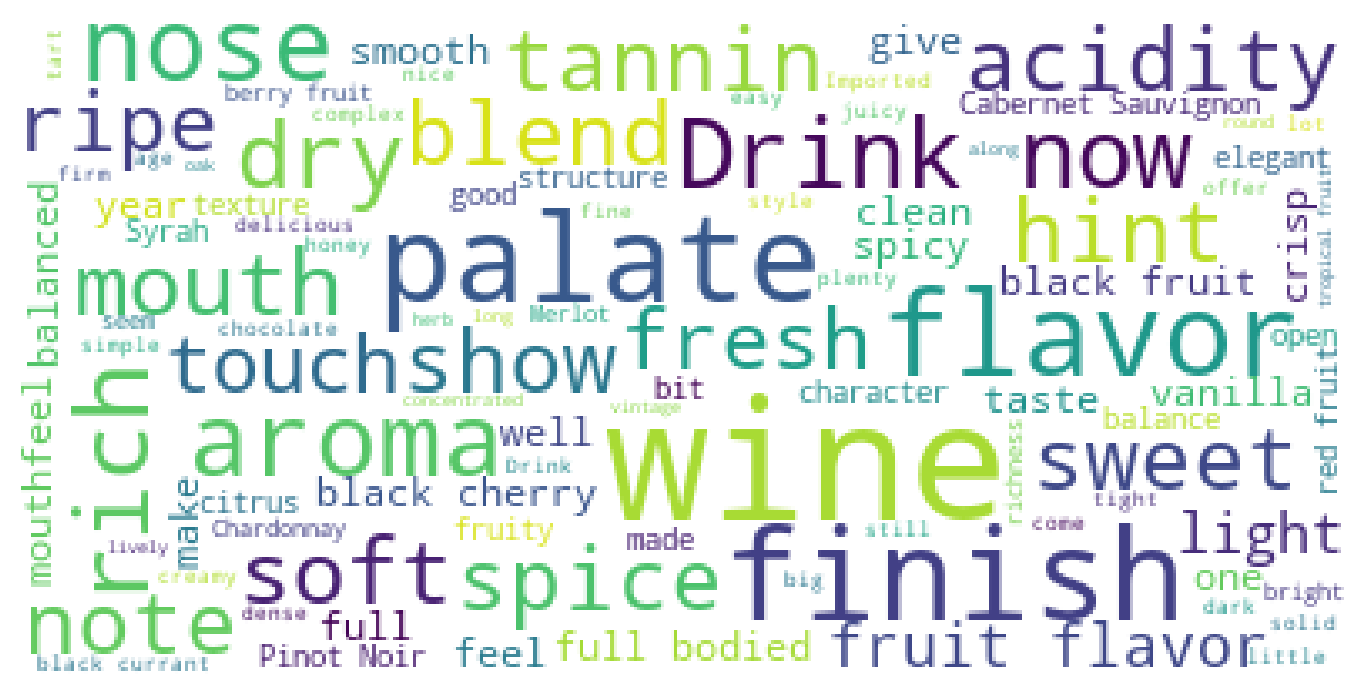

In [169]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(wc)
ax.set_axis_off()

## Designation

In [116]:
df.designation[0]

'Brut Blanc de Blancs'

In [128]:
df.designation.isna().sum() / df.description.size

0.3024415291857152

In [170]:
df.designation.dropna().unique().size

27800

<AxesSubplot:>

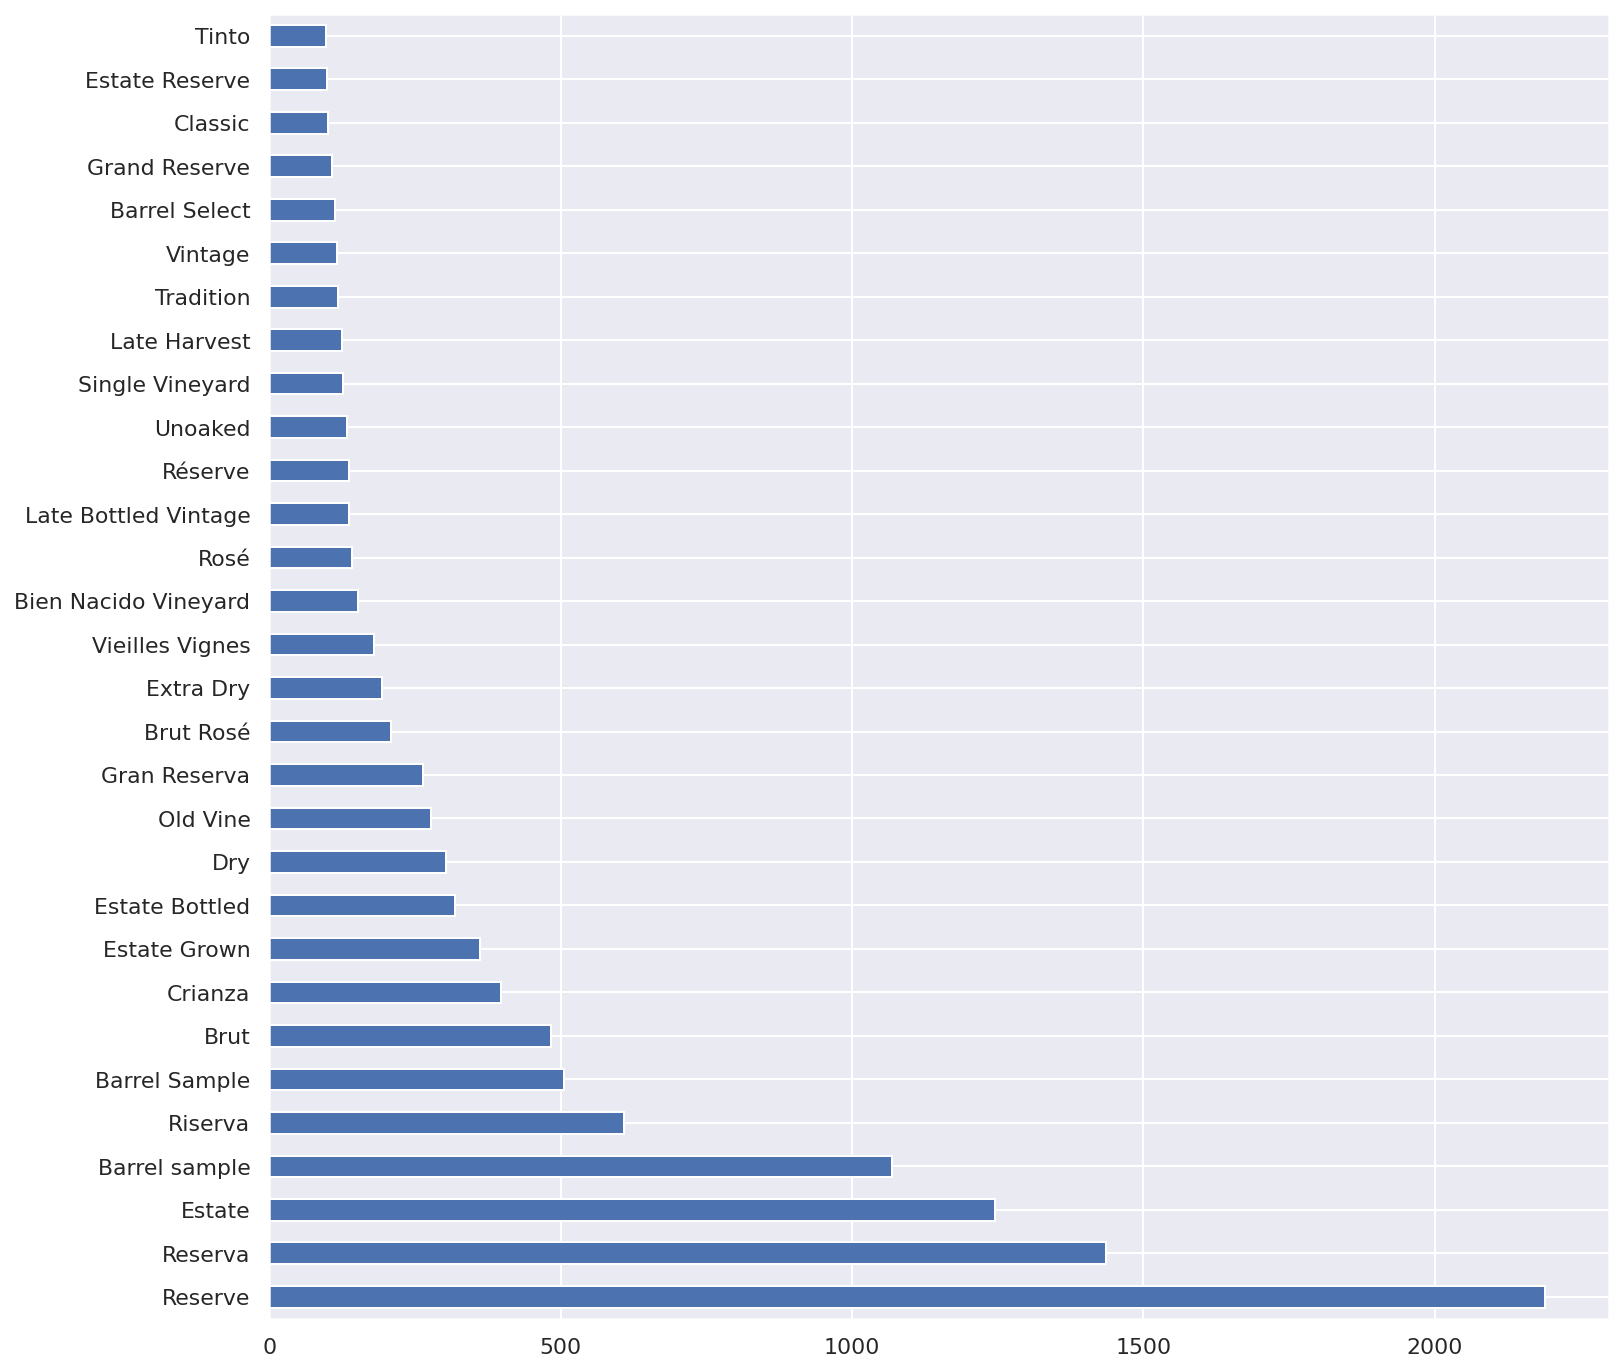

In [159]:
df.designation.dropna().value_counts()[:30].plot.barh(figsize=(12, 12))

<AxesSubplot:xlabel='quality', ylabel='designation'>

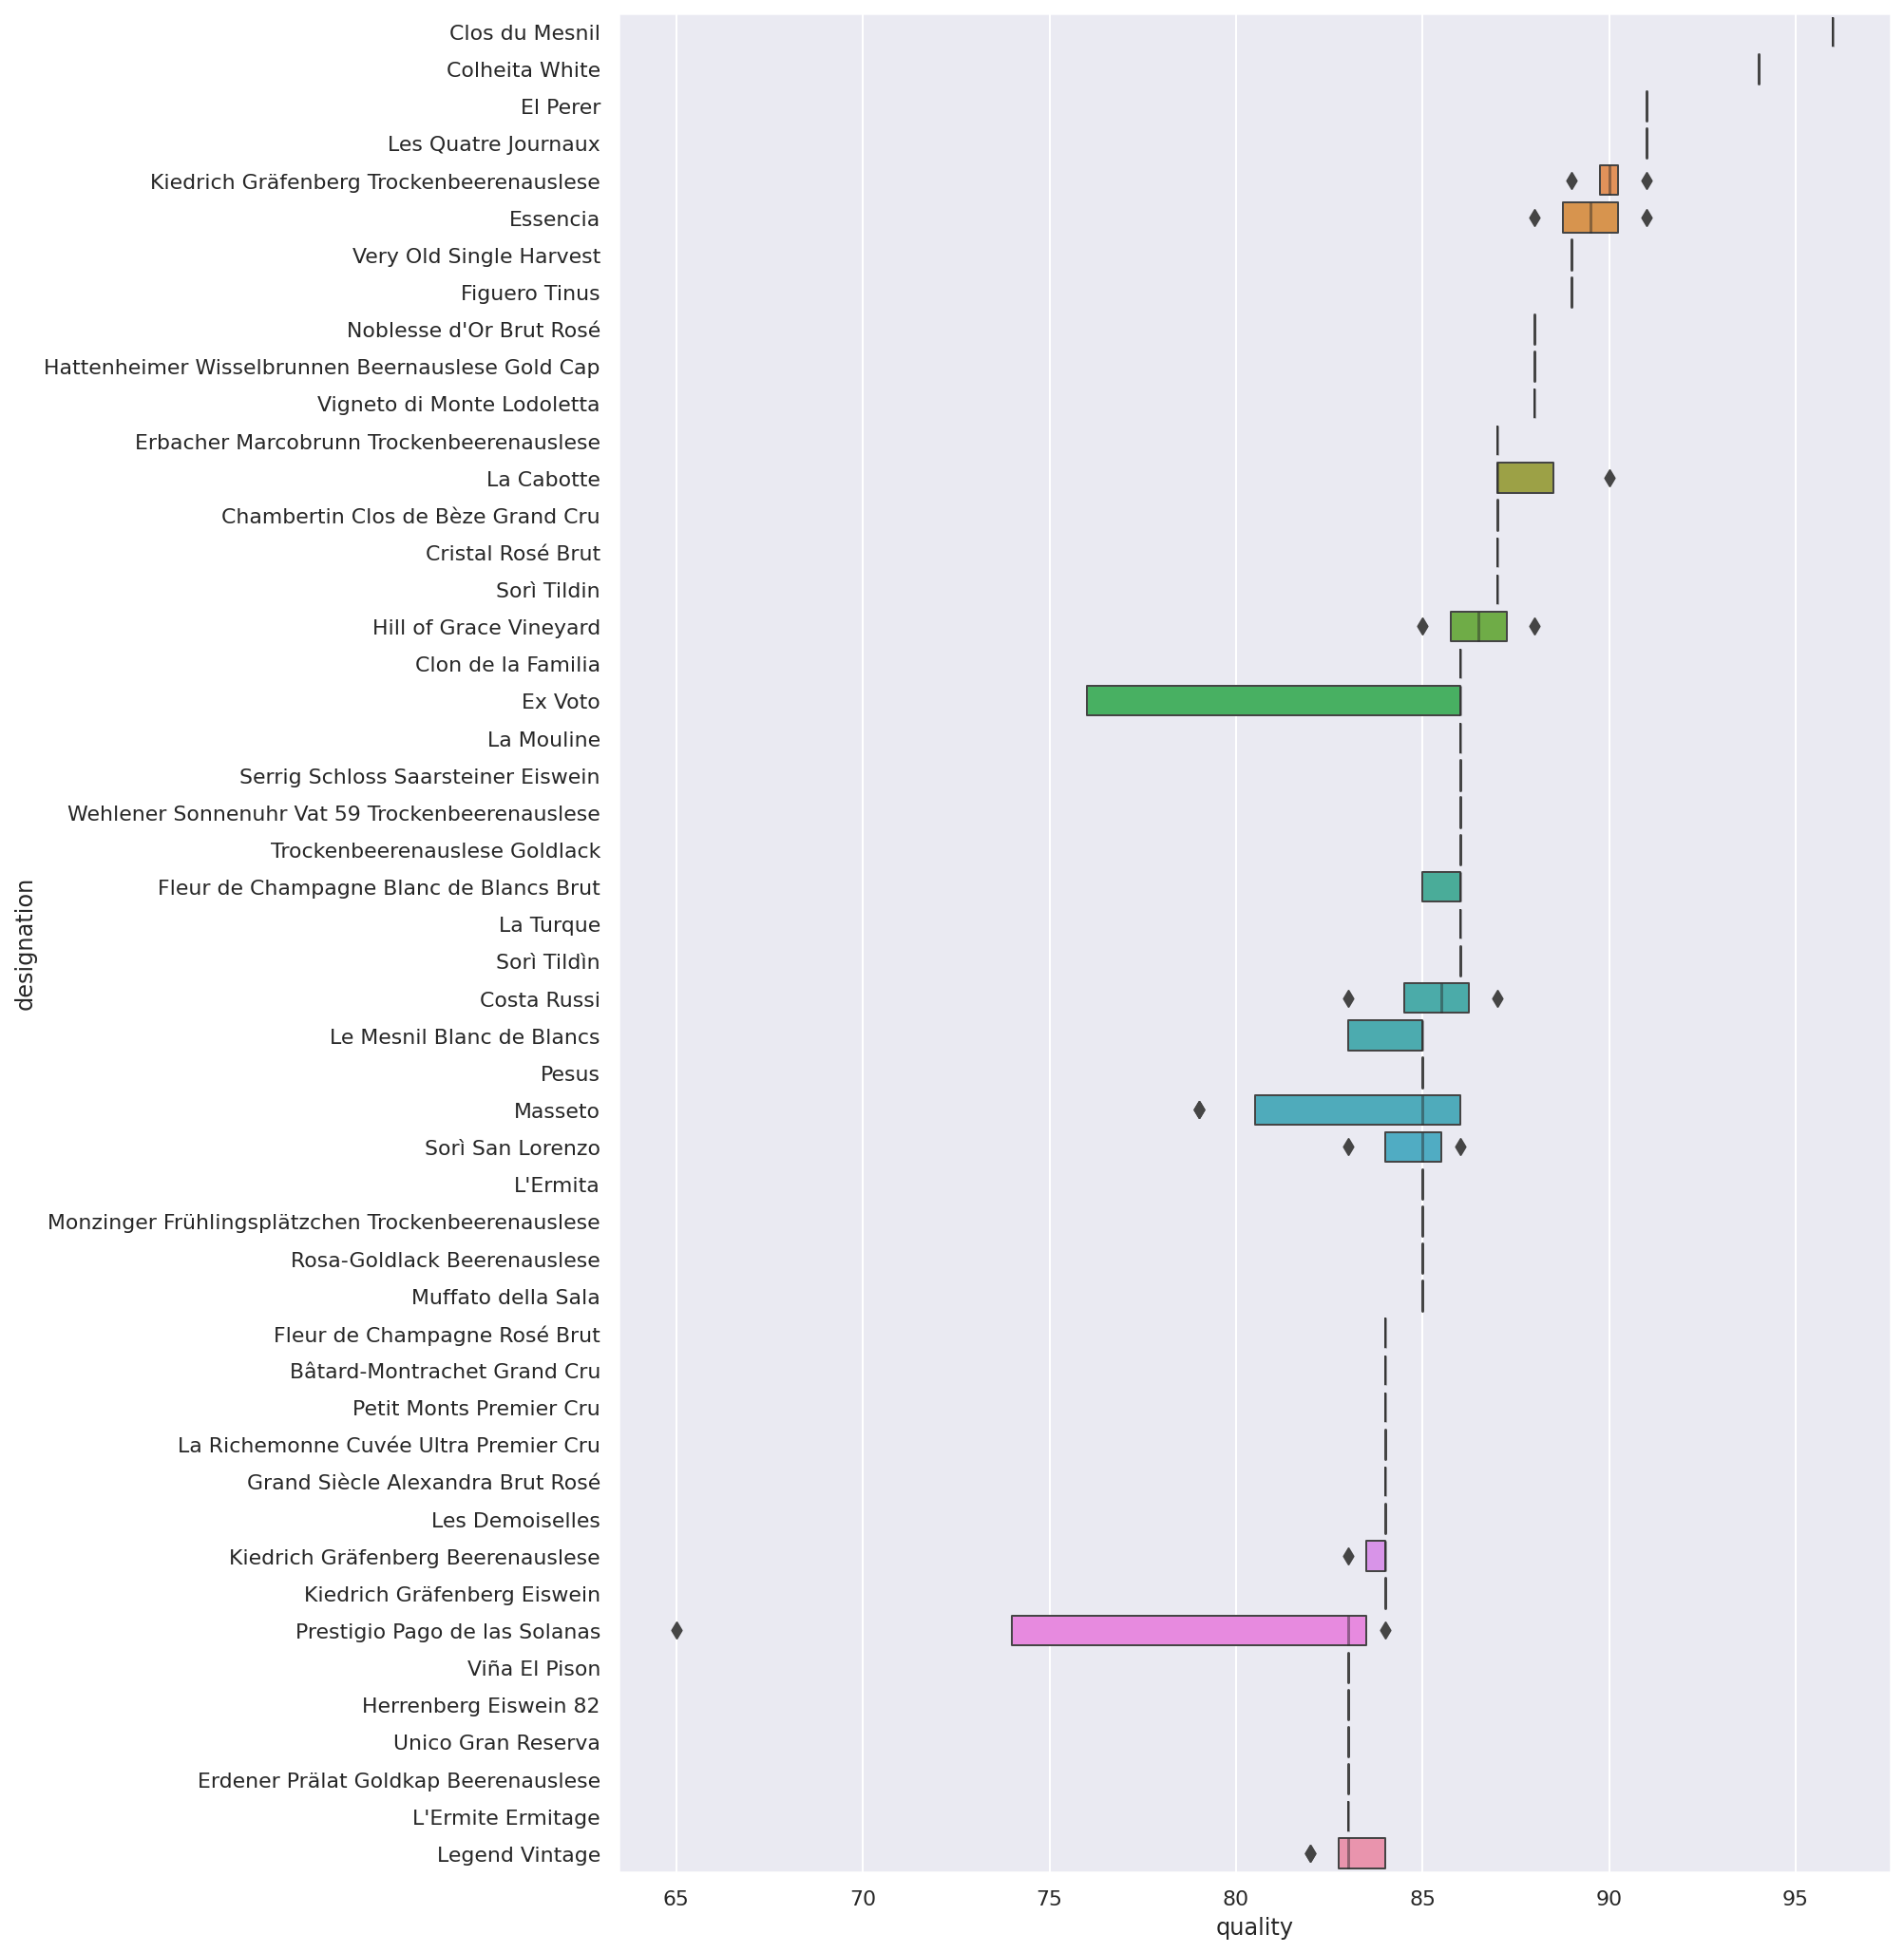

In [172]:
fig, ax = plt.subplots(figsize=(12, 18))
order = df.groupby(by='designation').quality.median().sort_values(ascending=False).iloc[:50].index
sns.boxenplot(ax=ax, data=df, x='quality', y='designation', order=order)

## Province

In [173]:
df.province[0]

'Alsace'

In [183]:
df.province.isna().sum()

5

In [179]:
df.province.unique().size

445

<AxesSubplot:xlabel='quality', ylabel='province'>

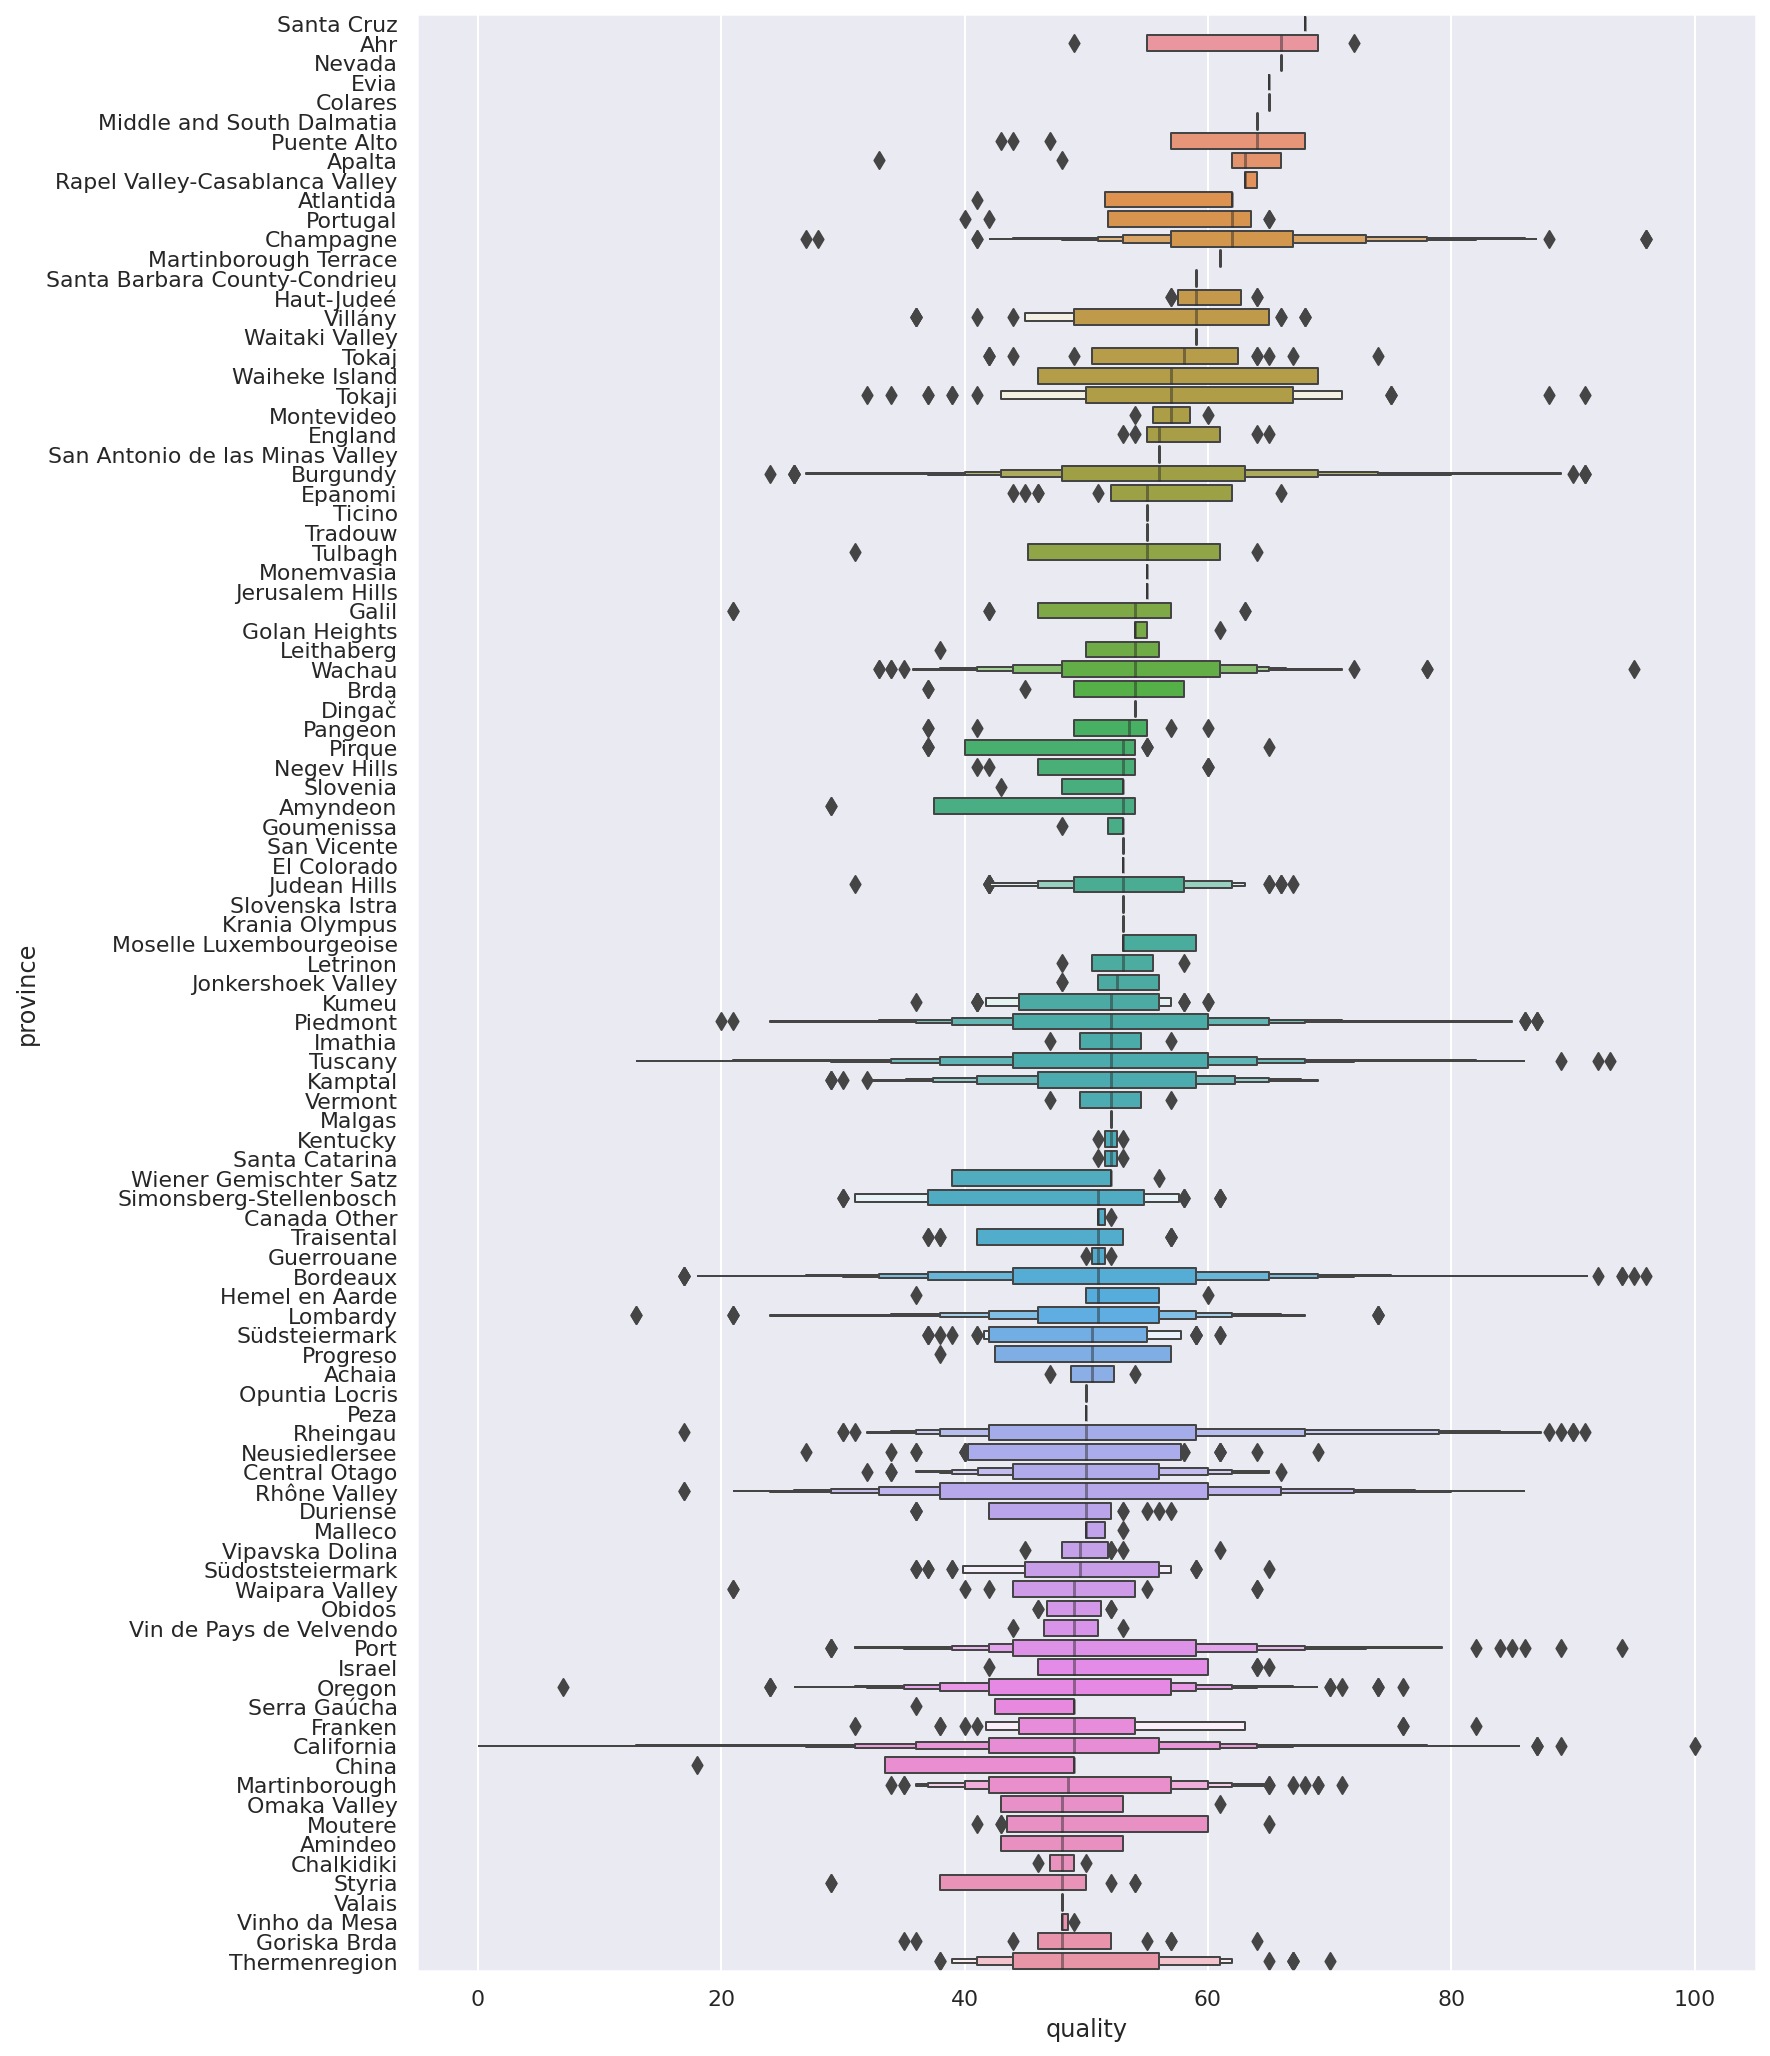

In [181]:
fig, ax = plt.subplots(figsize=(12, 18))
order = df.groupby(by='province').quality.median().sort_values(ascending=False).iloc[:100].index
sns.boxenplot(ax=ax, data=df, x='quality', y='province', order=order)

## Region 1

In [182]:
df.region_1[0]

"Crémant d'Alsace"

In [185]:
df.region_1.isna().sum() / df.description.size

0.1657059564036308

In [195]:
df.region_1.unique().size

1207

<AxesSubplot:xlabel='quality', ylabel='region_1'>

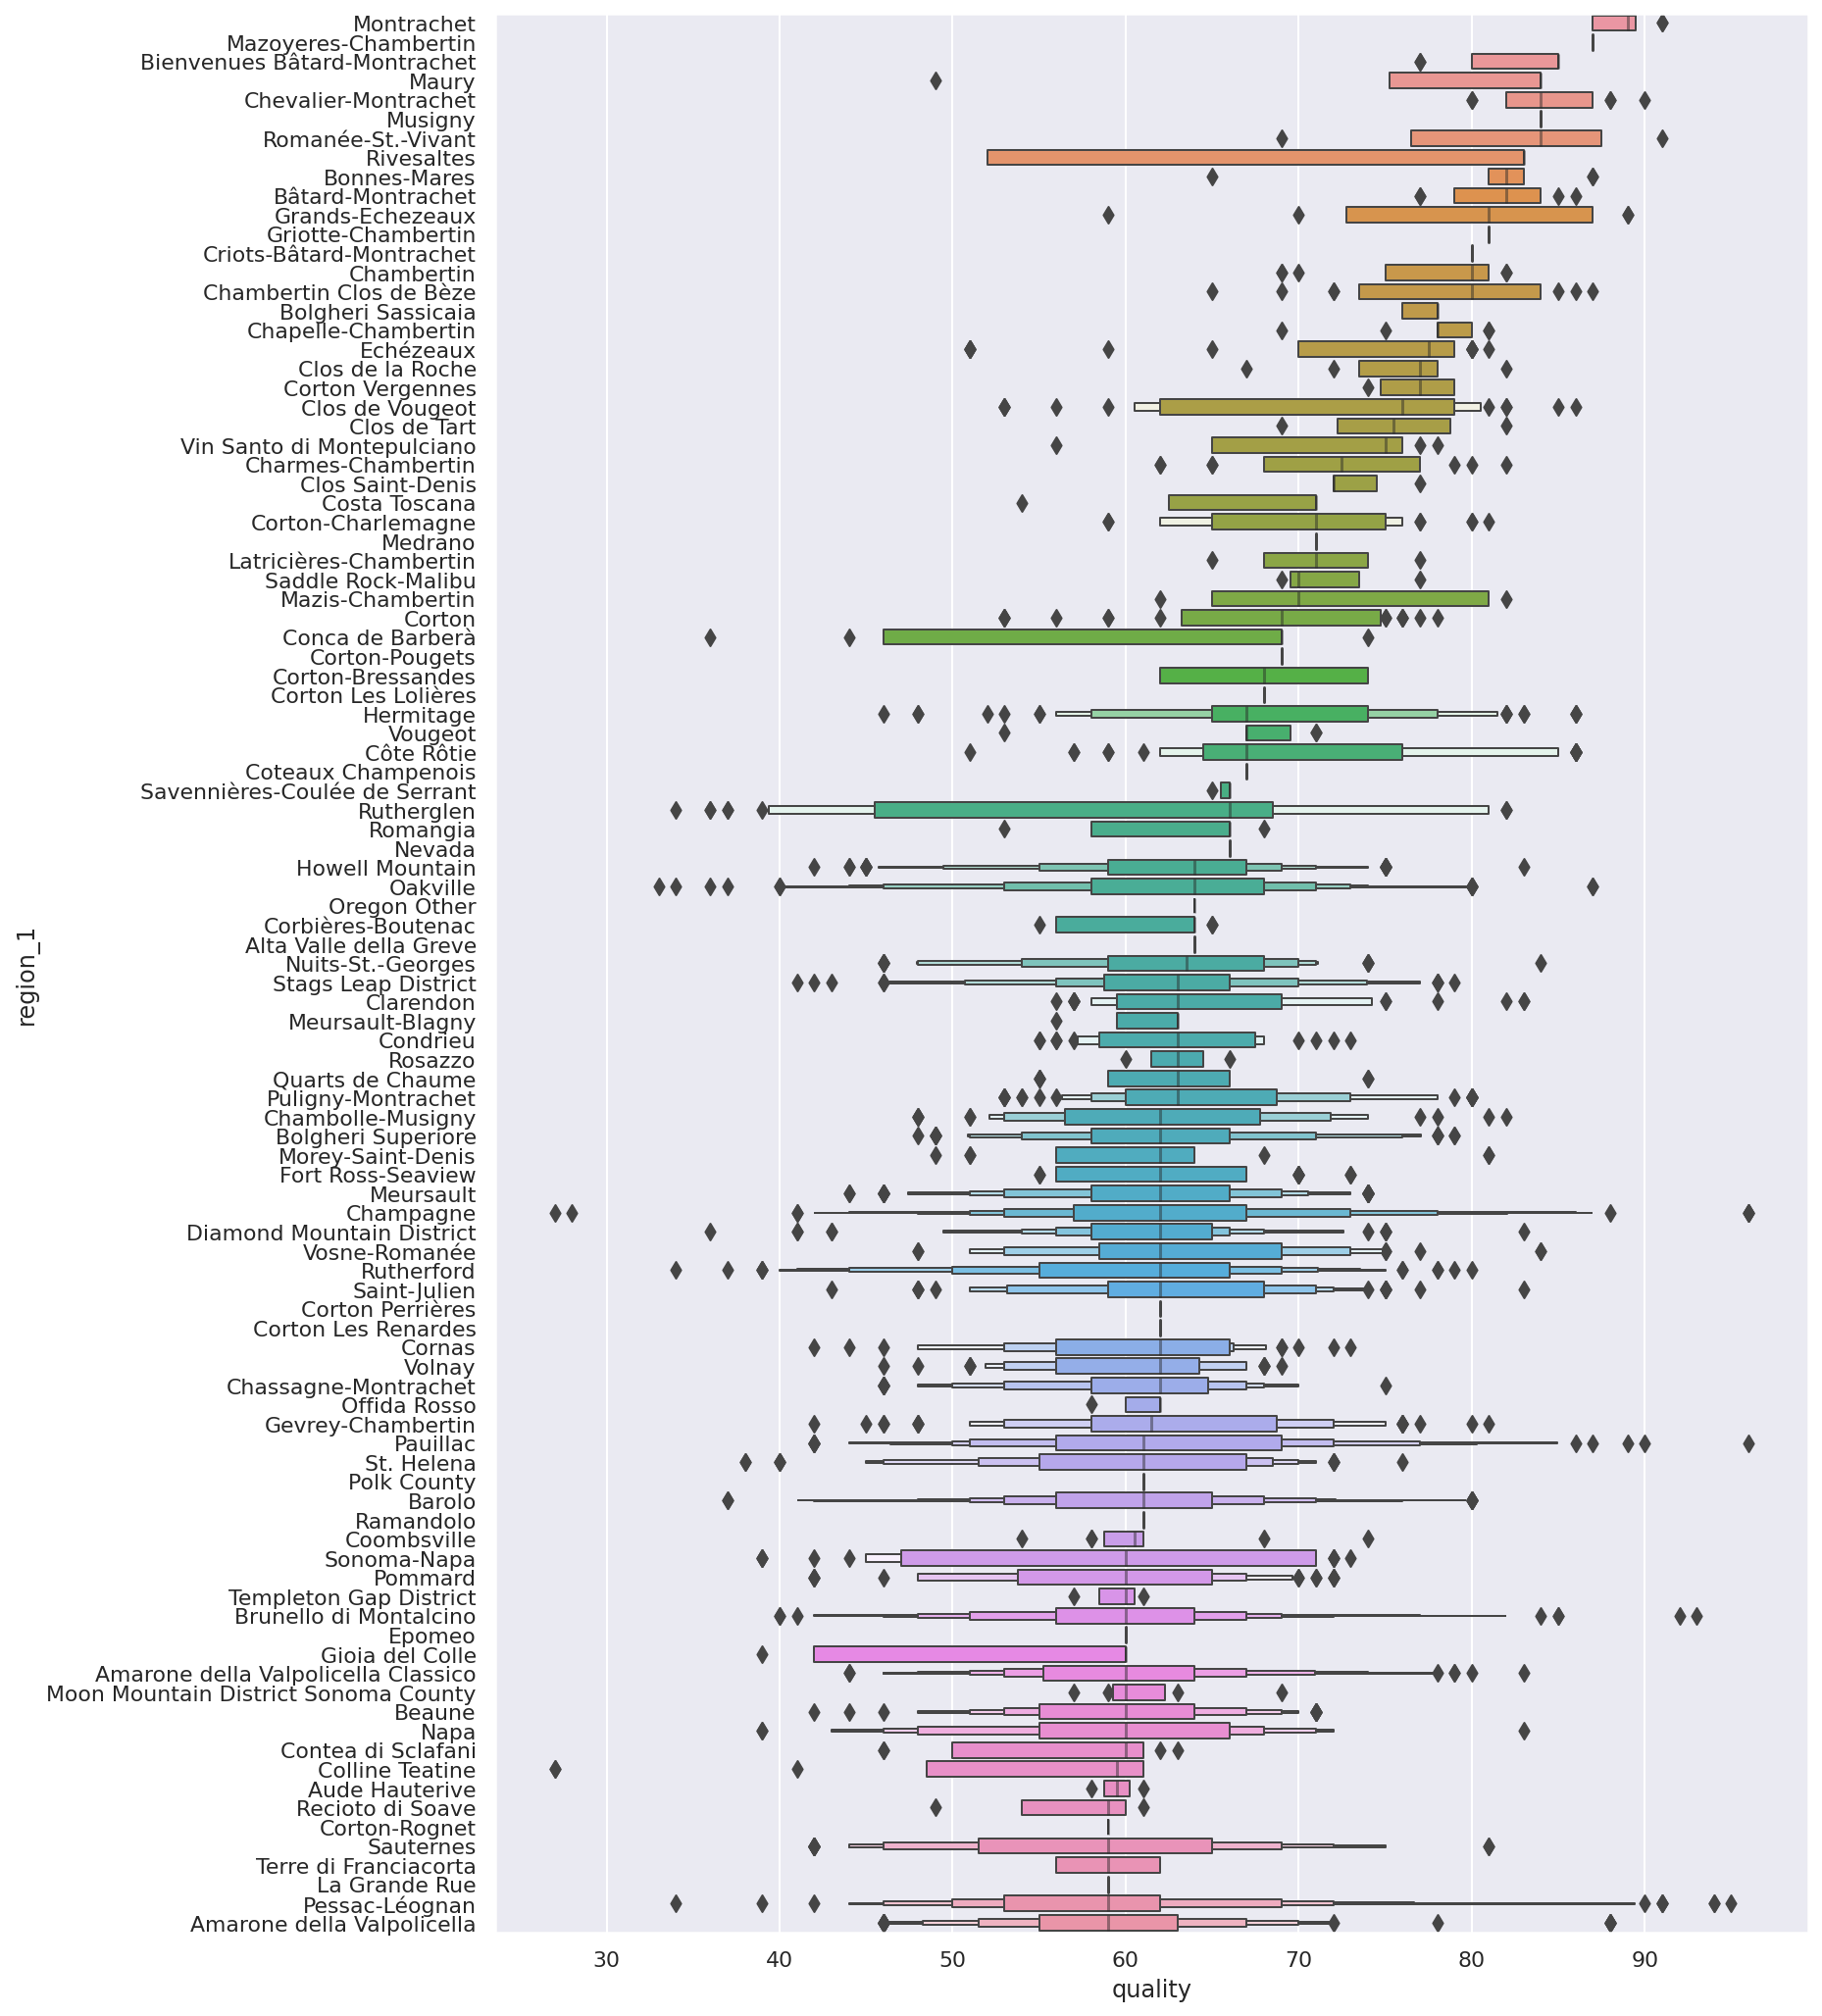

In [196]:
fig, ax = plt.subplots(figsize=(12, 18))
order = df.groupby(by='region_1').quality.median().sort_values(ascending=False).iloc[:100].index
sns.boxenplot(ax=ax, data=df, x='quality', y='region_1', order=order)

## Region 2

In [203]:
df.region_2[1]

'Central Coast'

In [204]:
df.region_2.isna().sum() / df.description.size

0.5963691777645266

In [205]:
df.region_2.unique().size

19

<AxesSubplot:xlabel='quality', ylabel='region_2'>

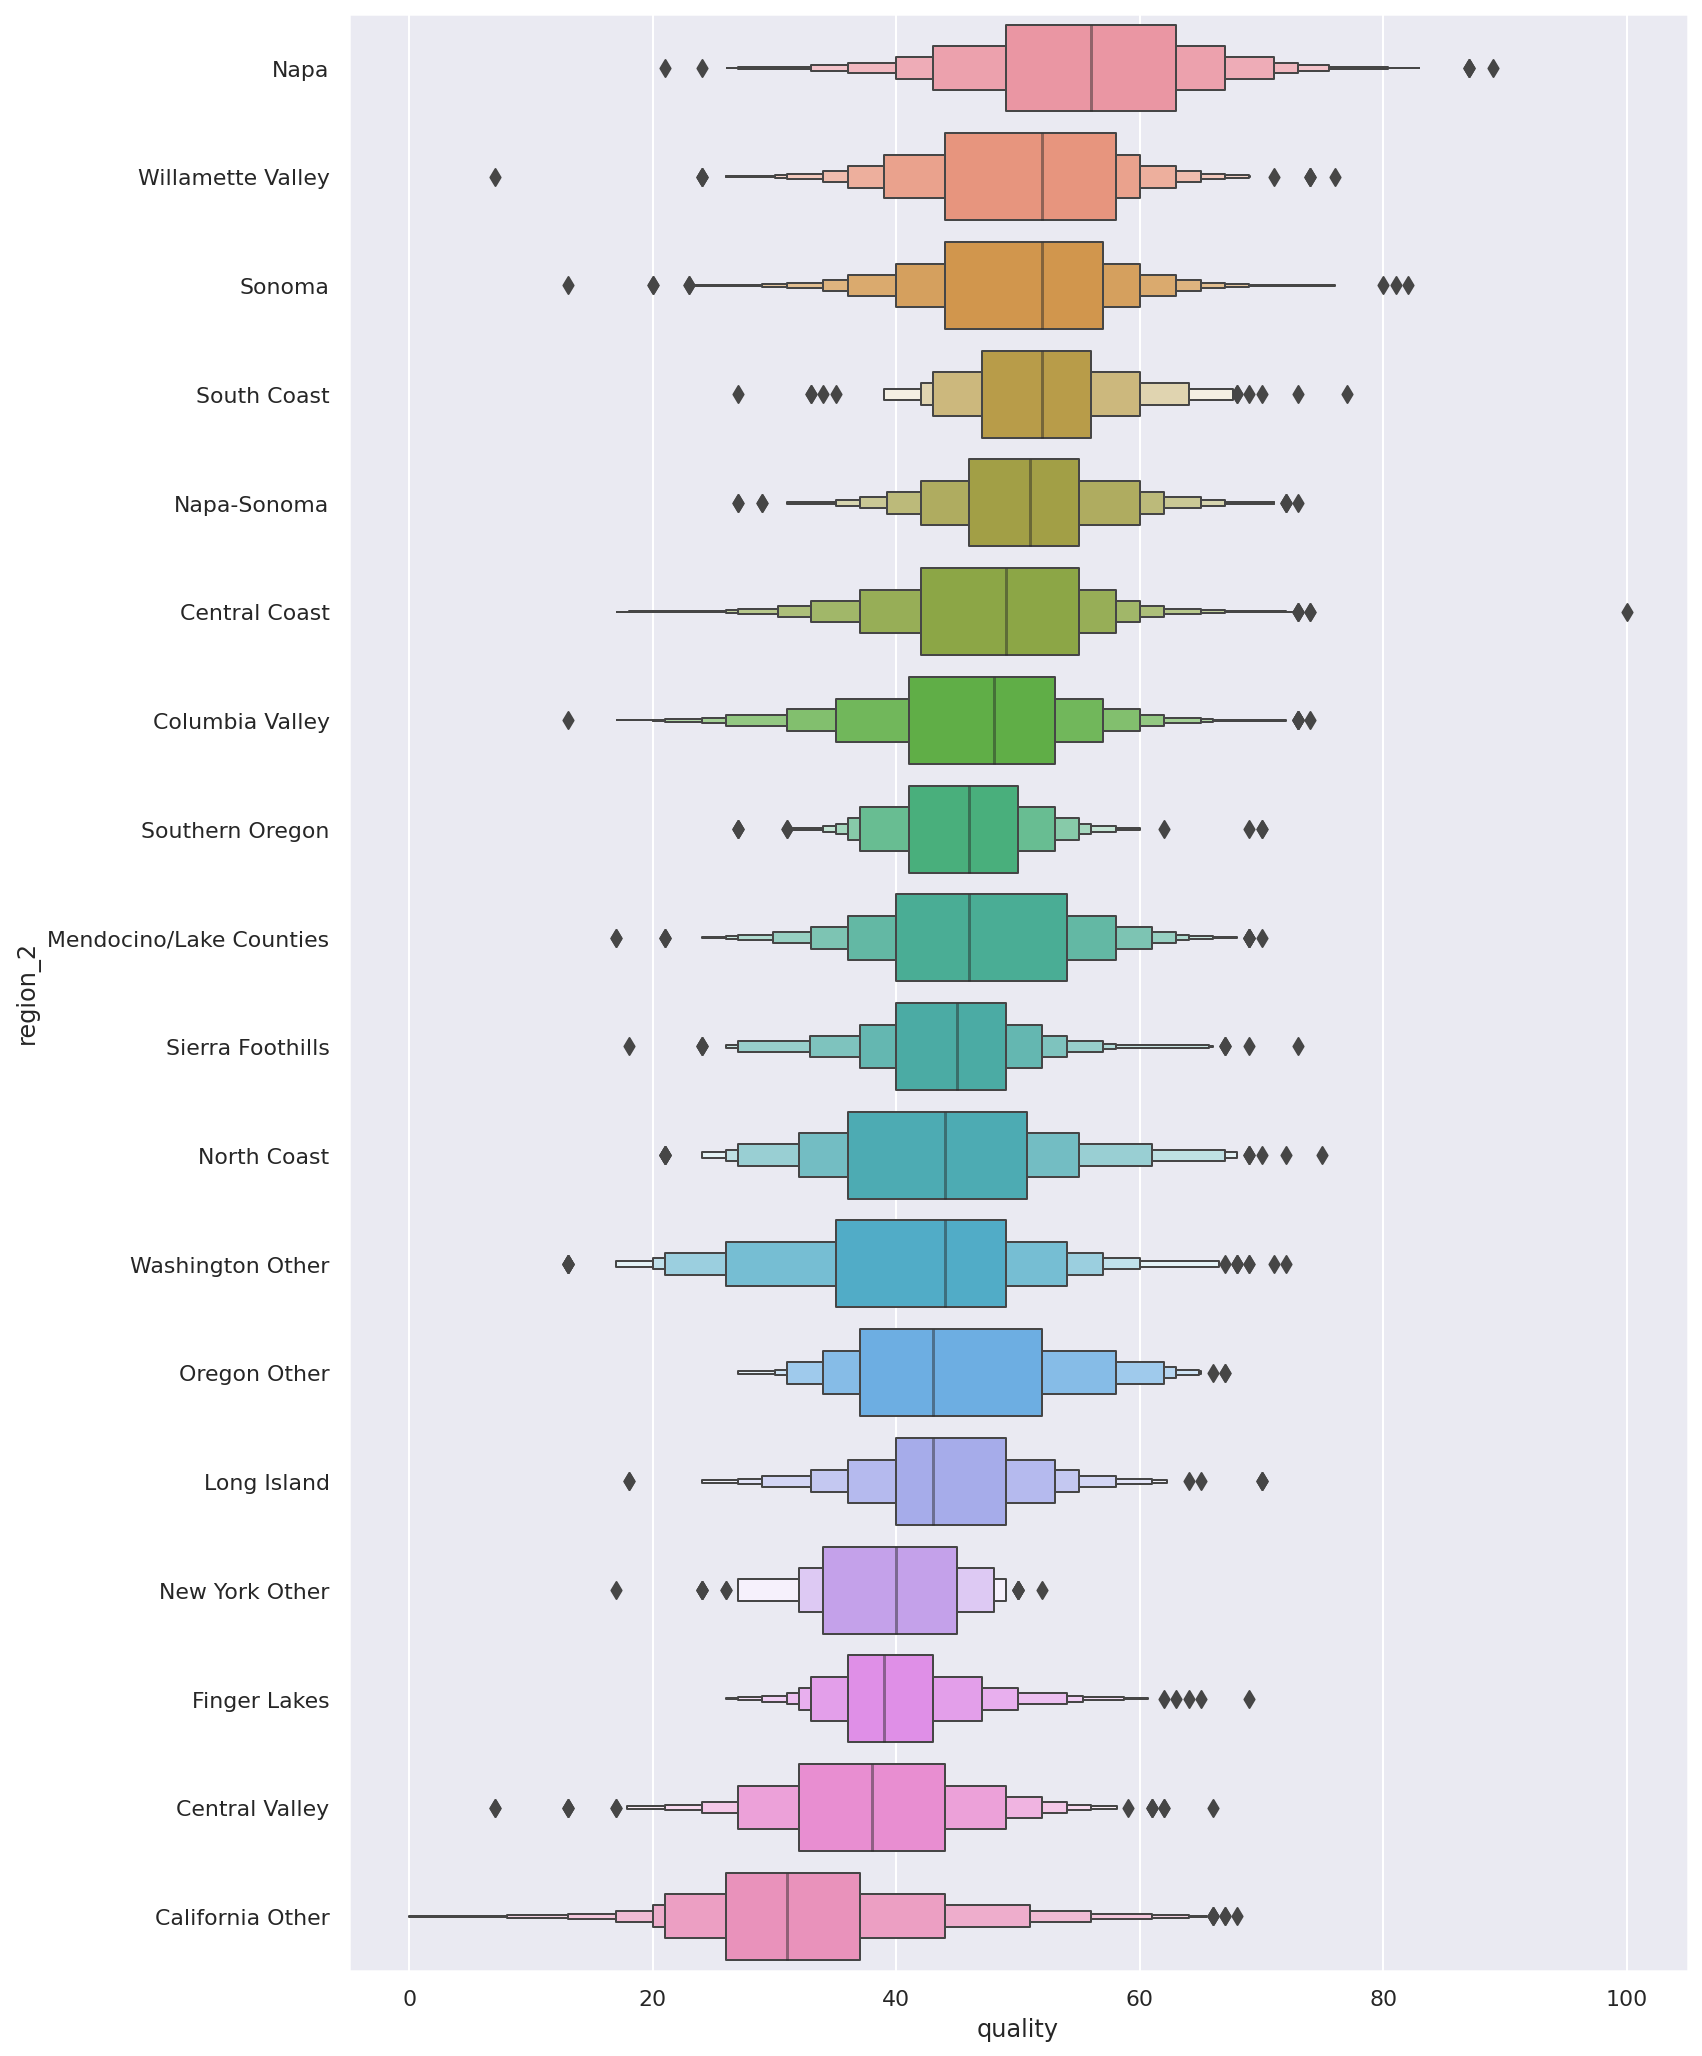

In [206]:
fig, ax = plt.subplots(figsize=(12, 18))
order = df.groupby(by='region_2').quality.median().sort_values(ascending=False).index
sns.boxenplot(ax=ax, data=df, x='quality', y='region_2', order=order)

## Variety

In [207]:
df.variety[0]

'Pinot Blanc'

In [209]:
df.variety.isna().sum()

0

In [212]:
df.variety.unique().size

603

<AxesSubplot:xlabel='quality', ylabel='variety'>

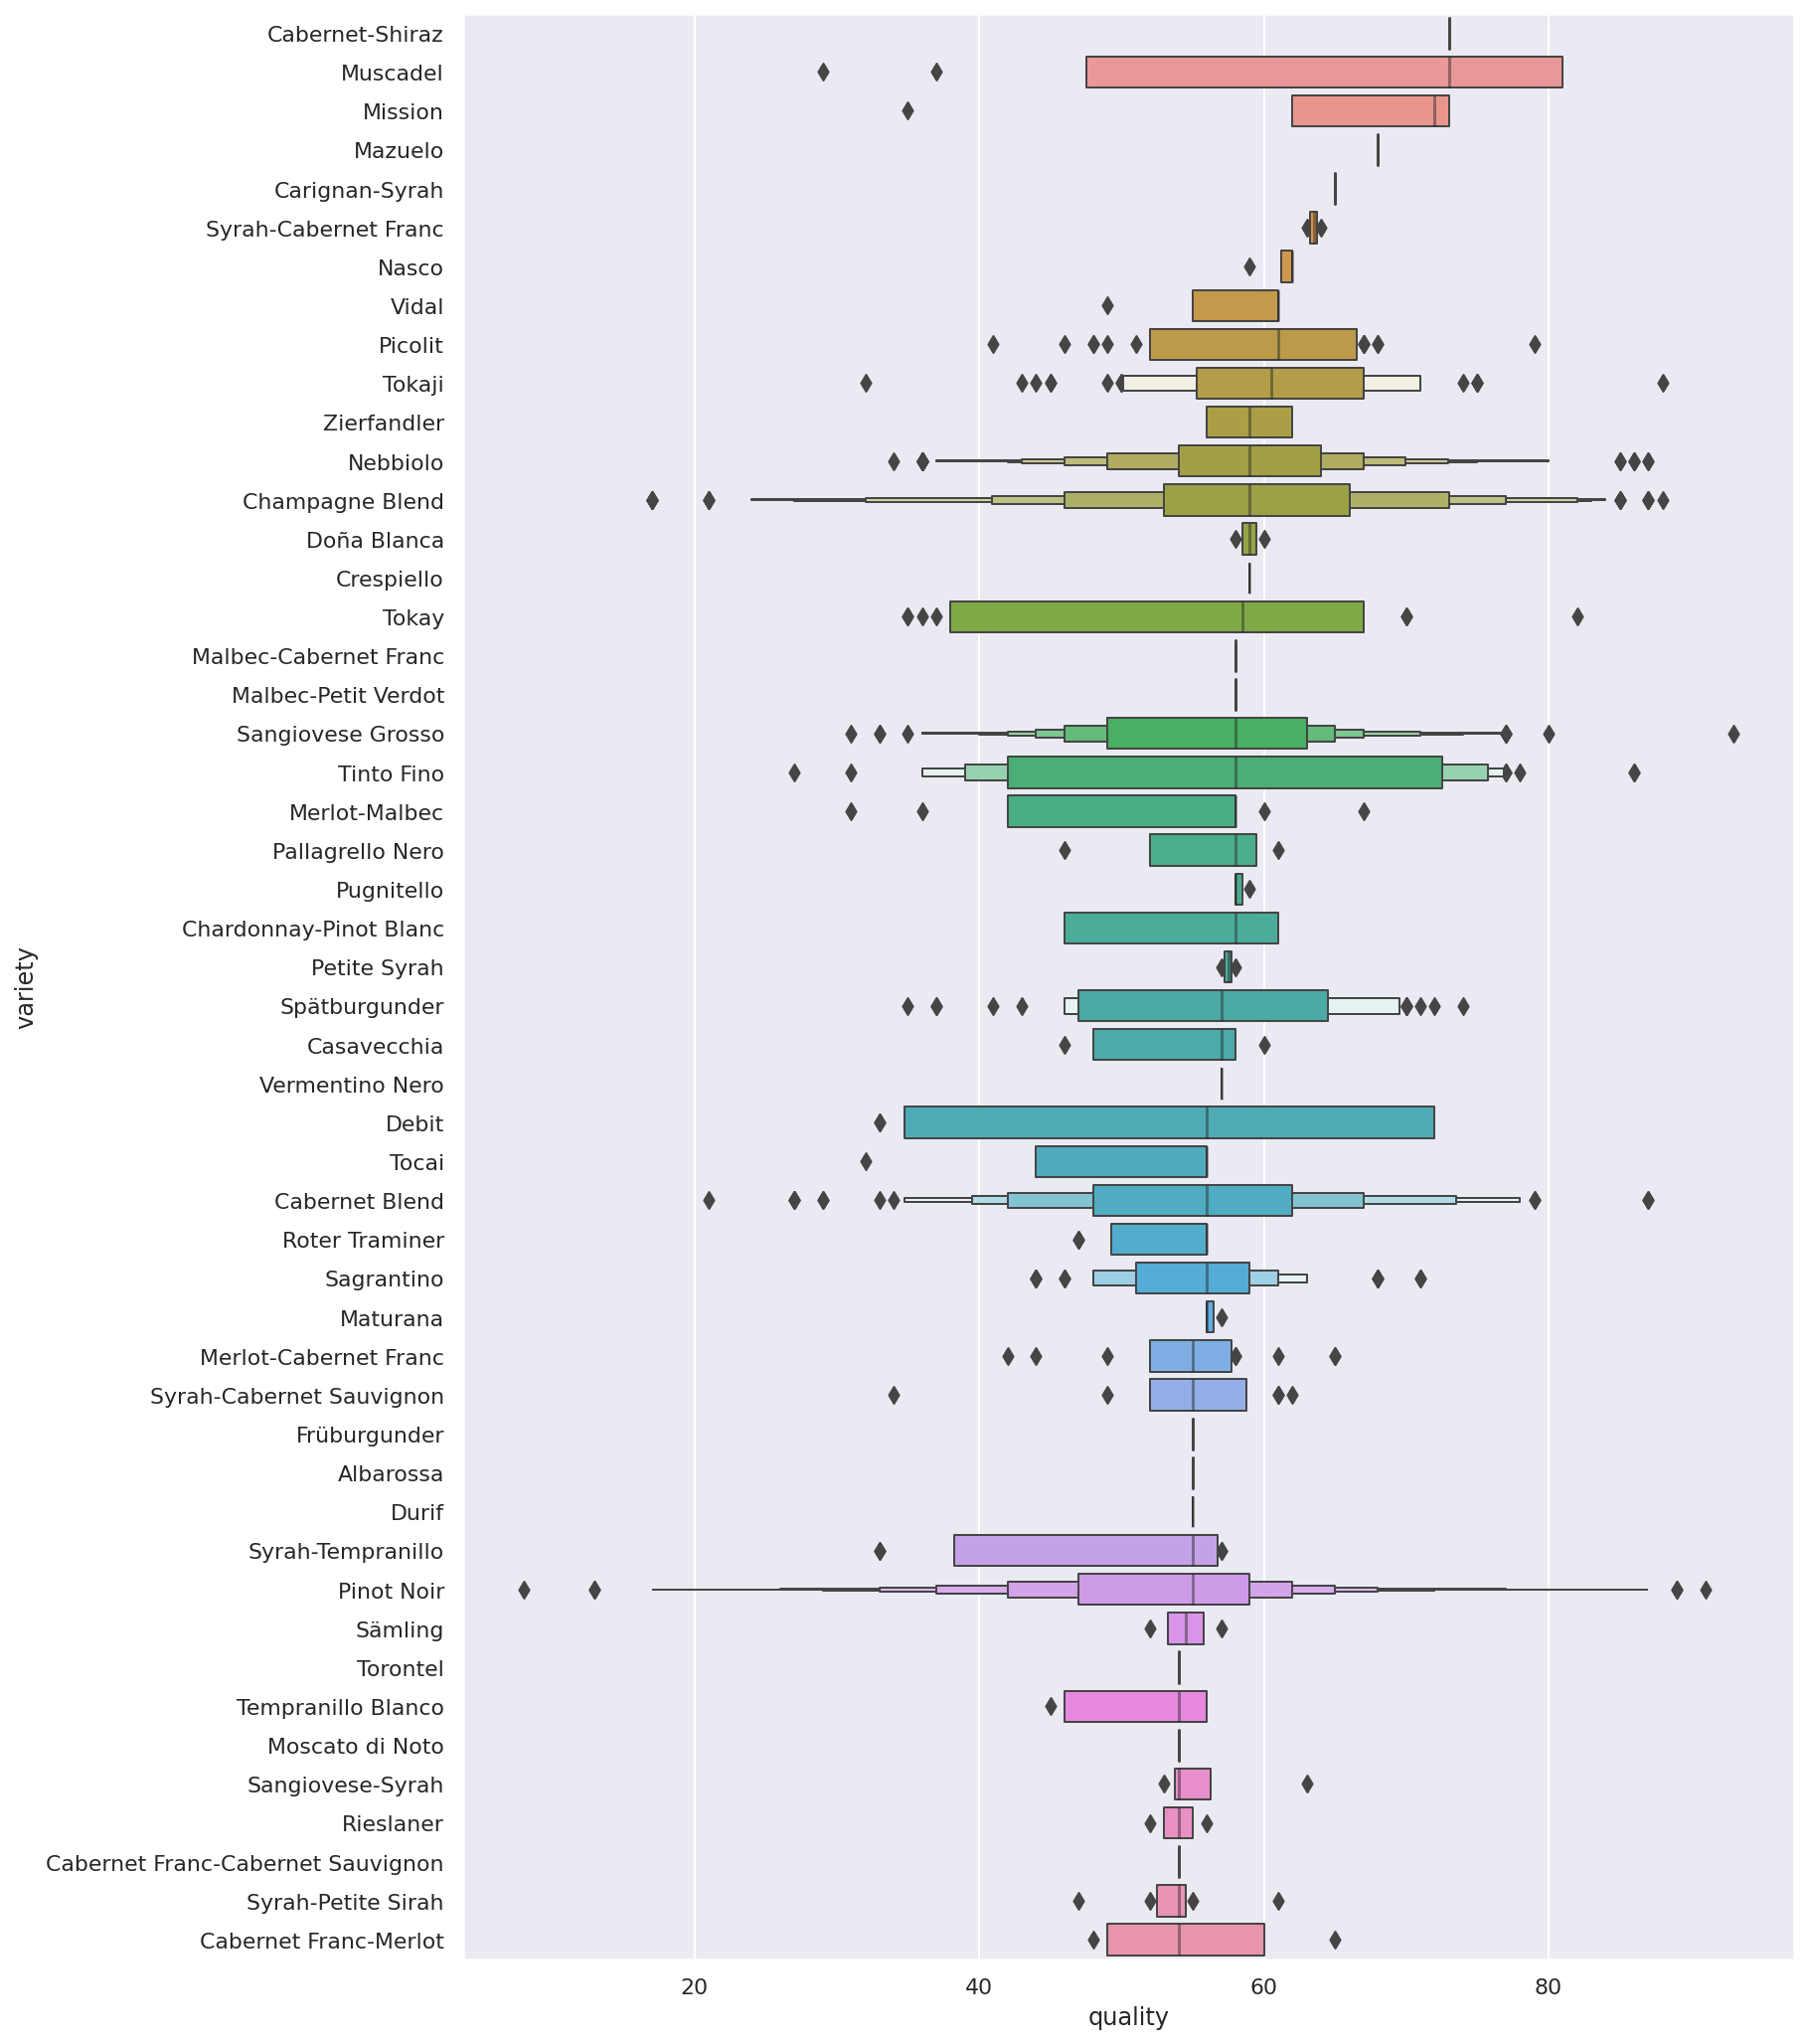

In [213]:
fig, ax = plt.subplots(figsize=(12, 18))
order = df.groupby(by='variety').quality.median().sort_values(ascending=False).iloc[:50].index
sns.boxenplot(ax=ax, data=df, x='quality', y='variety', order=order)

## Winery

In [214]:
df.winery[0]

'Lucien Albrecht'

In [215]:
df.winery.isna().sum()

0

In [216]:
df.winery.unique().size

14105

<AxesSubplot:xlabel='quality', ylabel='winery'>

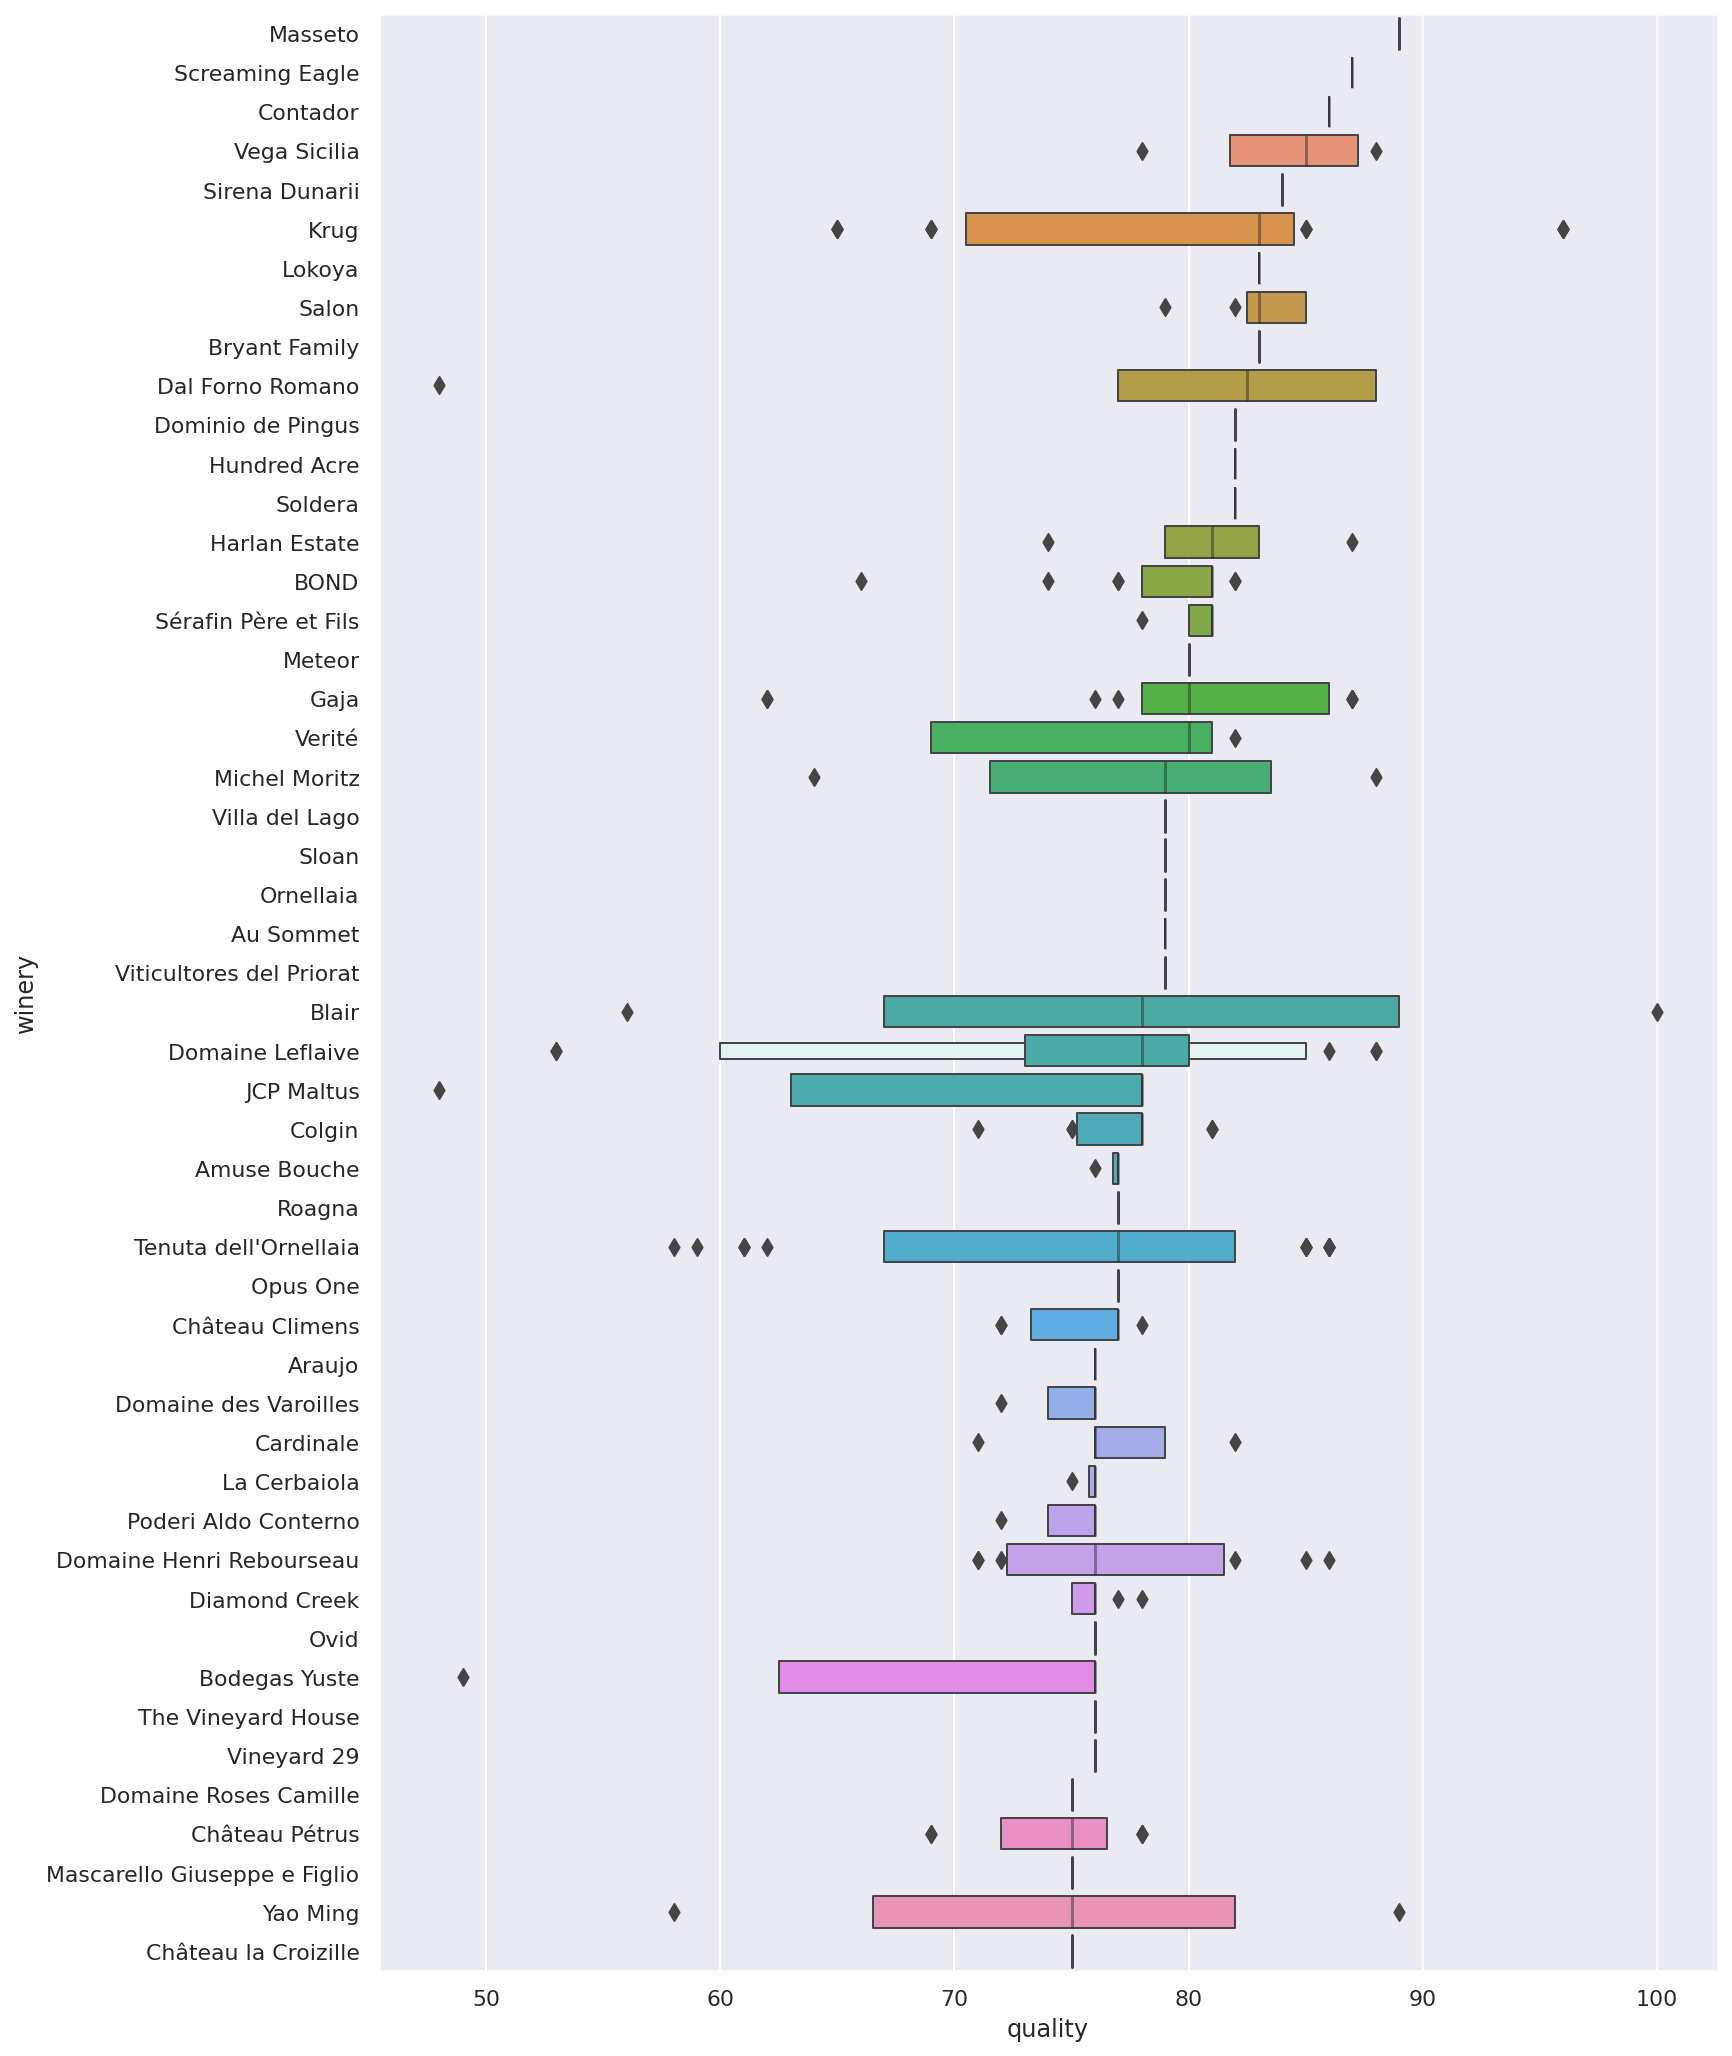

In [217]:
fig, ax = plt.subplots(figsize=(12, 18))
order = df.groupby(by='winery').quality.median().sort_values(ascending=False).iloc[:50].index
sns.boxenplot(ax=ax, data=df, x='quality', y='winery', order=order)

## Quality

In [233]:
df.quality[0]

45.0

In [234]:
df.quality.describe()

count    120744.000000
mean         46.277852
std          11.924781
min           0.000000
25%          38.000000
50%          46.000000
75%          55.000000
max         100.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='Density'>

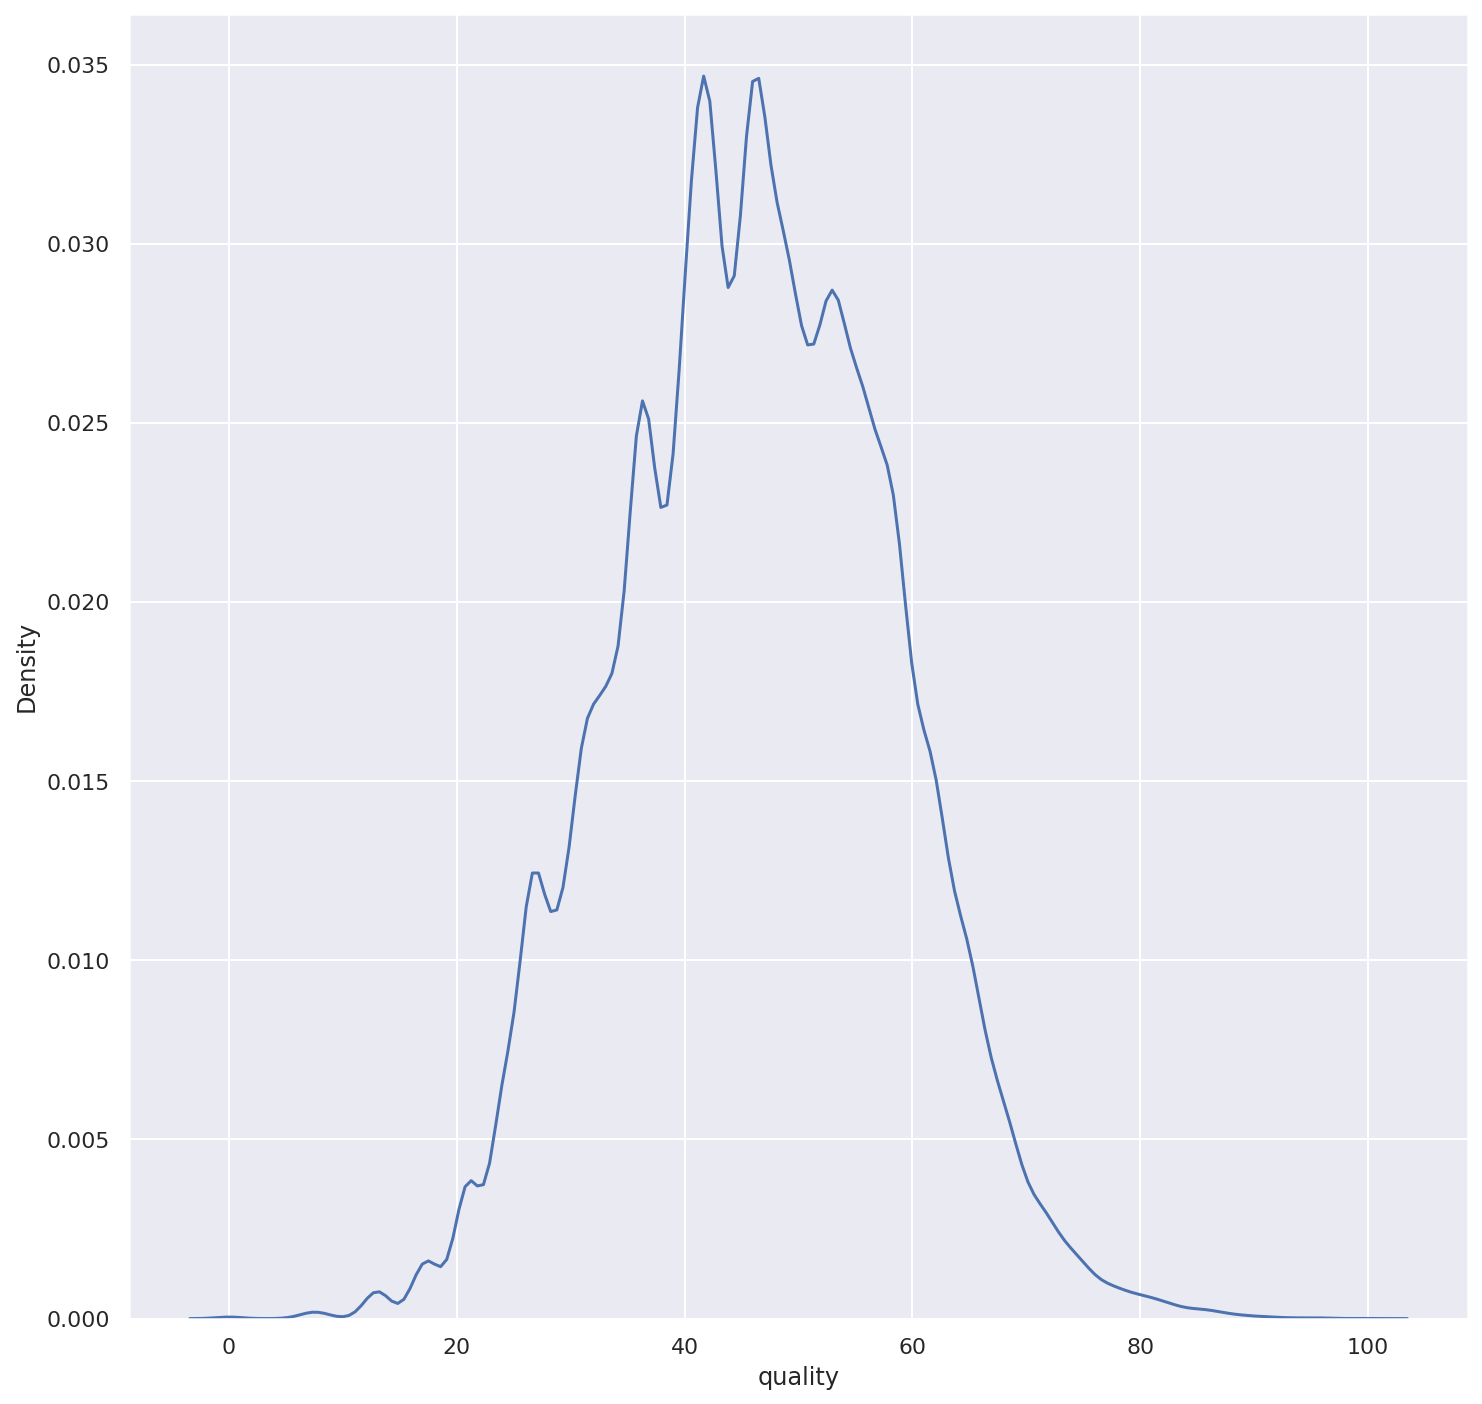

In [239]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.kdeplot(ax=ax, data=df, x='quality')

## Understanding the hierarchy in the features

In [218]:
df.head()

,country,description,designation,province,region_1,region_2,variety,winery,quality
0,France,"A creamed pear wine, with an attractive tang o...",Brut Blanc de Blancs,Alsace,Crémant d'Alsace,NaN,Pinot Blanc,Lucien Albrecht,45.0
1,US,"Simple and dry, this Cabernet has modest black...",NaN,California,Paso Robles,Central Coast,Cabernet Sauvignon,Castle Rock,31.0
2,US,"This lovely wine captures the floral, perfumed...",NaN,Oregon,Willamette Valley,Willamette Valley,Gewürztraminer,Château Bianca,35.0
3,Portugal,"The aromas are the thing here, as so often wit...",NaN,Alentejano,NaN,NaN,Touriga Nacional,Herdade do Esporão,41.0
4,Italy,"This is an interesting, outright strange wine ...",Natì,Southern Italy,Pompeiano,NaN,Coda di Volpe,Sorrentino,37.0


In [231]:
df.description.value_counts().head(20)

A little bit funky and unsettled when you pop the screwcap, but soon it finds its floral, blueberry base. Remains superficial and sweet in the mouth, with candied flavors, vanilla and mild oak. Highly regular; could use more concentration and density.                                              6
Powerful in Zinny character, this blend of Dry Creek and Russian River grapes bursts with brawny flavors of wild berries, chocolate-covered mint, tobacco and pepper, wrapped into sturdy tannins. Shows real class and character.                                                                       6
92-94 Barrel sample. A rounded wine, its tannins submerged into the ripe fruits. It feels soft, and there is just a bite of alcohol. The structure is soft, generous, opulent.                                                                                                                           5
86-88 This could work as a rich wine, because there is good structure and piles of botrytis. It could b